# Comprehensive Statistical Analysis of Titanic Dataset

This notebook performs:
- **Univariate Analysis**: Non-graphical and graphical methods
- **Bivariate Analysis**: Statistical tests and visualizations
- **Multivariate Analysis**: Advanced statistical methods and visualizations

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.multivariate.manova import MANOVA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the Titanic dataset
df = pd.read_csv('titanicDataset.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nBasic Info:")
print(df.info())

Dataset Shape: (1309, 14)

First few rows:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.d

## 1. UNIVARIATE ANALYSIS

### 1.1 Non-Graphical Methods

In [4]:
# Univariate Non-Graphical: Mean, Median, Mode, Variance, Std Dev, Range, IQR

# Select numeric columns for analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("="*80)
print("UNIVARIATE NON-GRAPHICAL ANALYSIS")
print("="*80)

for col in numeric_cols:
    data = df[col].dropna()
    
    print(f"\n{'='*80}")
    print(f"Variable: {col.upper()}")
    print(f"{'='*80}")
    
    # Central Tendency
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().values[0] if len(data.mode()) > 0 else "No mode"
    
    print(f"\nCentral Tendency:")
    print(f"  Mean:     {mean_val:.4f}")
    print(f"  Median:   {median_val:.4f}")
    print(f"  Mode:     {mode_val}")
    
    # Dispersion
    variance = data.var()
    std_dev = data.std()
    range_val = data.max() - data.min()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    print(f"\nDispersion:")
    print(f"  Variance:     {variance:.4f}")
    print(f"  Std Dev:      {std_dev:.4f}")
    print(f"  Range:        {range_val:.4f}")
    print(f"  Q1:           {q1:.4f}")
    print(f"  Q3:           {q3:.4f}")
    print(f"  IQR:          {iqr:.4f}")
    
    print(f"\nOther Statistics:")
    print(f"  Min:          {data.min():.4f}")
    print(f"  Max:          {data.max():.4f}")
    print(f"  Count:        {len(data)}")
    print(f"  Missing:      {df[col].isna().sum()}")

UNIVARIATE NON-GRAPHICAL ANALYSIS

Variable: PCLASS

Central Tendency:
  Mean:     2.2949
  Median:   3.0000
  Mode:     3

Dispersion:
  Variance:     0.7020
  Std Dev:      0.8378
  Range:        2.0000
  Q1:           2.0000
  Q3:           3.0000
  IQR:          1.0000

Other Statistics:
  Min:          1.0000
  Max:          3.0000
  Count:        1309
  Missing:      0

Variable: SURVIVED

Central Tendency:
  Mean:     0.3820
  Median:   0.0000
  Mode:     0

Dispersion:
  Variance:     0.2362
  Std Dev:      0.4861
  Range:        1.0000
  Q1:           0.0000
  Q3:           1.0000
  IQR:          1.0000

Other Statistics:
  Min:          0.0000
  Max:          1.0000
  Count:        1309
  Missing:      0

Variable: AGE

Central Tendency:
  Mean:     29.8811
  Median:   28.0000
  Mode:     24.0

Dispersion:
  Variance:     207.7488
  Std Dev:      14.4135
  Range:        79.8300
  Q1:           21.0000
  Q3:           39.0000
  IQR:          18.0000

Other Statistics:
  Min:  

In [5]:
# Frequency Tables for categorical and numeric variables

print("="*80)
print("FREQUENCY TABLES")
print("="*80)

# Categorical columns
categorical_cols = ['pclass', 'survived', 'sex', 'embarked']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{'='*80}")
        print(f"Frequency Table for: {col.upper()}")
        print(f"{'='*80}")
        
        freq_table = df[col].value_counts().sort_index()
        rel_freq = df[col].value_counts(normalize=True).sort_index() * 100
        
        freq_df = pd.DataFrame({
            'Value': freq_table.index,
            'Frequency': freq_table.values,
            'Relative Freq (%)': rel_freq.values
        })
        
        print(freq_df.to_string(index=False))
        print(f"\nTotal: {freq_table.sum()}")

# Age groups frequency
print(f"\n{'='*80}")
print("Frequency Table for: AGE GROUPS")
print(f"{'='*80}")

age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-30)', 'Adult (31-50)', 'Senior (51+)']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

freq_table = df['age_group'].value_counts().sort_index()
rel_freq = df['age_group'].value_counts(normalize=True).sort_index() * 100

freq_df = pd.DataFrame({
    'Age Group': freq_table.index,
    'Frequency': freq_table.values,
    'Relative Freq (%)': rel_freq.values
})

print(freq_df.to_string(index=False))

FREQUENCY TABLES

Frequency Table for: PCLASS
 Value  Frequency  Relative Freq (%)
     1        323          24.675325
     2        277          21.161192
     3        709          54.163484

Total: 1309

Frequency Table for: SURVIVED
 Value  Frequency  Relative Freq (%)
     0        809          61.802903
     1        500          38.197097

Total: 1309

Frequency Table for: SEX
 Value  Frequency  Relative Freq (%)
female        466          35.599694
  male        843          64.400306

Total: 1309

Frequency Table for: EMBARKED
Value  Frequency  Relative Freq (%)
    C        270          20.657995
    Q        123           9.410865
    S        914          69.931140

Total: 1307

Frequency Table for: AGE GROUPS
          Age Group  Frequency  Relative Freq (%)
       Child (0-12)         94           8.986616
       Teen (13-18)         99           9.464627
Young Adult (19-30)        416          39.770554
      Adult (31-50)        342          32.695985
       Senior (51

### 1.2 Graphical Methods

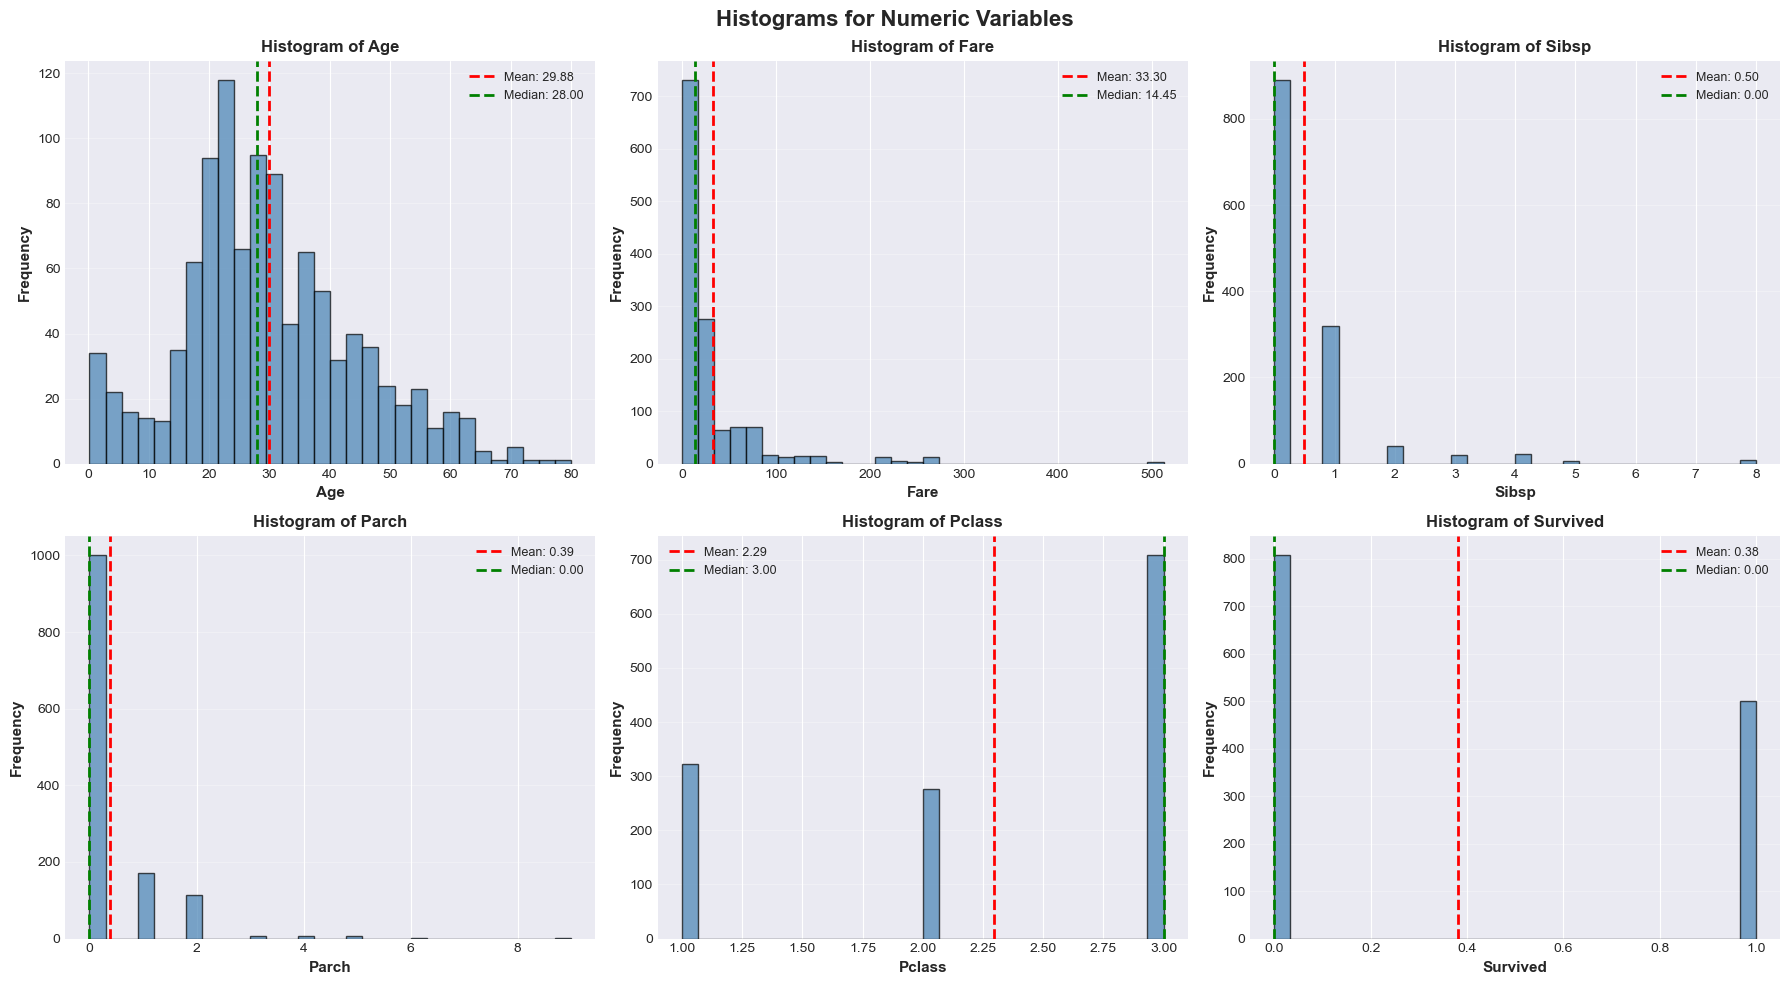

In [6]:
# Univariate Graphical: Histogram

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Histograms for Numeric Variables', fontsize=16, fontweight='bold')

numeric_cols_plot = ['age', 'fare', 'sibsp', 'parch', 'pclass', 'survived']

for idx, col in enumerate(numeric_cols_plot):
    ax = axes[idx // 3, idx % 3]
    data = df[col].dropna()
    
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_xlabel(col.capitalize(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'Histogram of {col.capitalize()}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

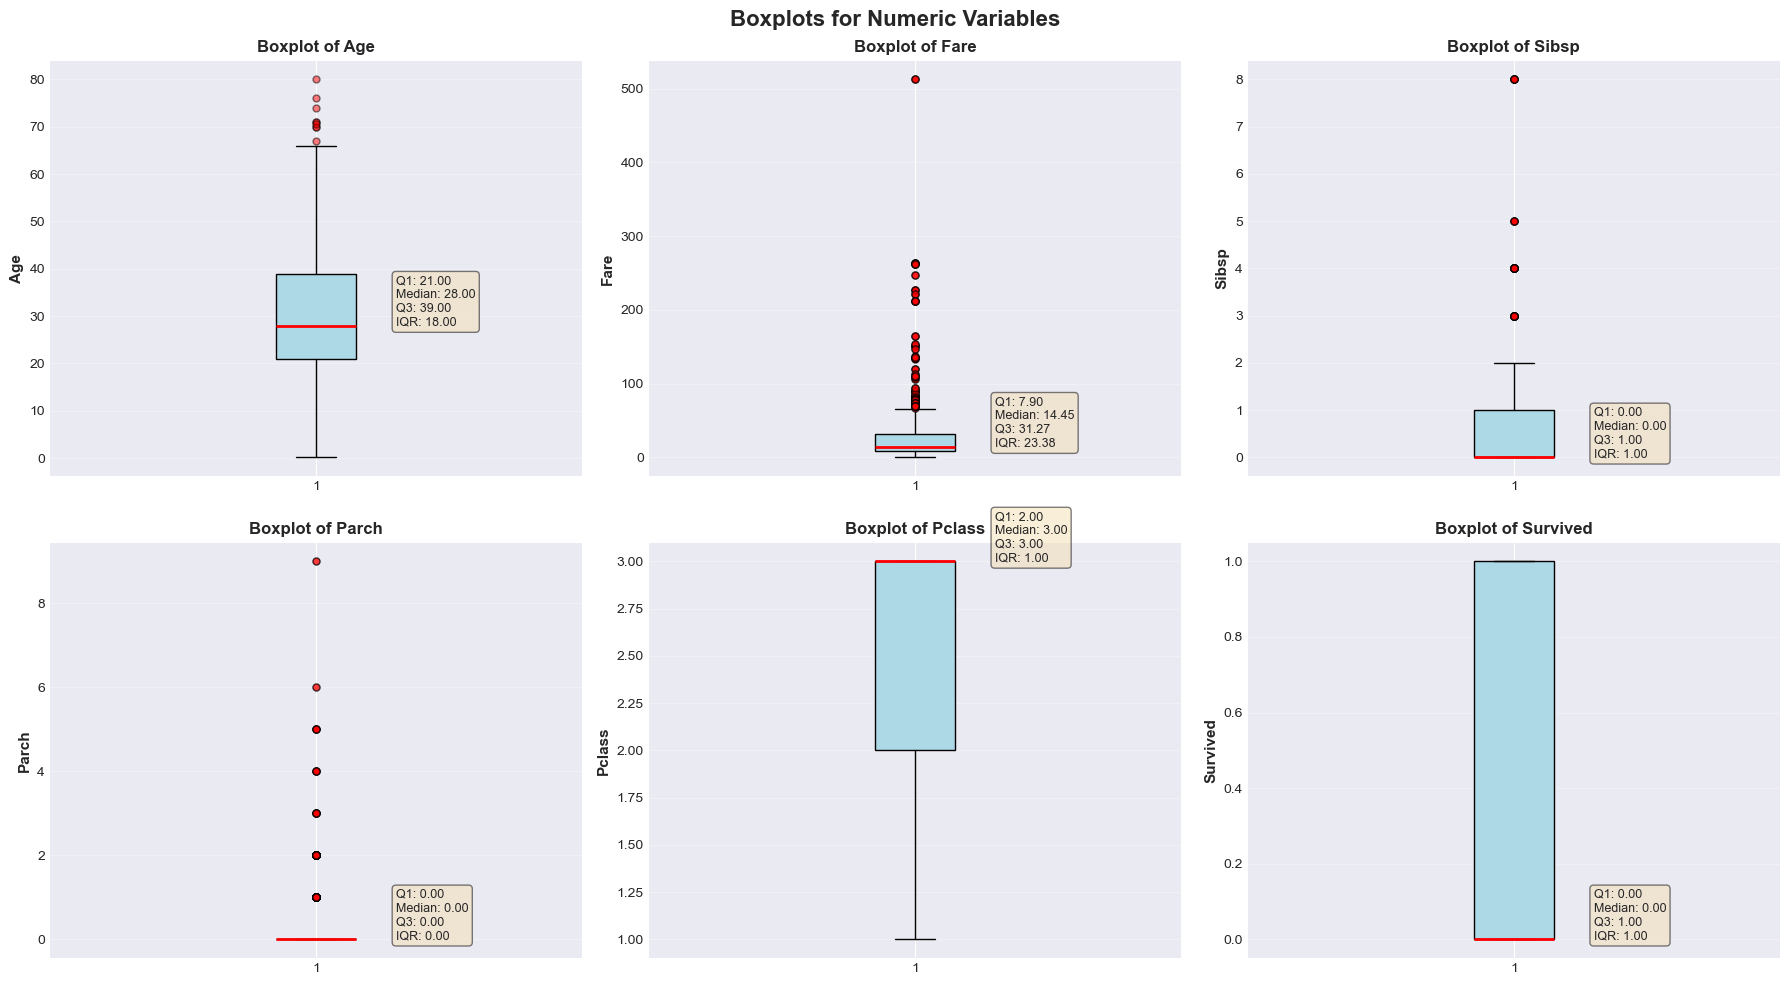

In [7]:
# Univariate Graphical: Boxplot

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots for Numeric Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_cols_plot):
    ax = axes[idx // 3, idx % 3]
    data = df[col].dropna()
    
    bp = ax.boxplot(data, vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='black'),
                     whiskerprops=dict(color='black'),
                     capprops=dict(color='black'),
                     medianprops=dict(color='red', linewidth=2),
                     flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
    
    ax.set_ylabel(col.capitalize(), fontsize=11, fontweight='bold')
    ax.set_title(f'Boxplot of {col.capitalize()}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics as text
    stats_text = f"Q1: {data.quantile(0.25):.2f}\nMedian: {data.median():.2f}\nQ3: {data.quantile(0.75):.2f}\nIQR: {data.quantile(0.75)-data.quantile(0.25):.2f}"
    ax.text(1.15, data.median(), stats_text, fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [8]:
# Univariate Graphical: Stem-and-Leaf Plot

def stem_leaf_plot(data, title):
    """Create a stem-and-leaf plot for given data"""
    data_sorted = np.sort(data)
    
    print(f"\n{'='*60}")
    print(f"Stem-and-Leaf Plot: {title}")
    print(f"{'='*60}")
    print("Stem | Leaf")
    print("-" * 60)
    
    # Group by stem (tens digit)
    stems = {}
    for val in data_sorted:
        if not np.isnan(val):
            stem = int(val // 10)
            leaf = int(val % 10)
            if stem not in stems:
                stems[stem] = []
            stems[stem].append(leaf)
    
    for stem in sorted(stems.keys()):
        leaves = ' '.join(map(str, stems[stem]))
        print(f"{stem:4d} | {leaves}")
    
    print(f"{'='*60}")
    print(f"n = {len(data_sorted)}")

# Create stem-and-leaf plots for age and fare (limited to reasonable ranges)
age_data = df['age'].dropna()
age_sample = age_data[age_data <= 80].head(50)  # Sample for readability
stem_leaf_plot(age_sample, "Age (Sample of 50)")

fare_data = df['fare'].dropna()
fare_sample = fare_data[fare_data <= 100].head(50)  # Sample for readability
stem_leaf_plot(fare_sample, "Fare (Sample of 50, Fare ≤ 100)")


Stem-and-Leaf Plot: Age (Sample of 50)
Stem | Leaf
------------------------------------------------------------
   0 | 0 2
   1 | 7 8 9
   2 | 2 4 4 5 5 5 6 6 8 8 9 9
   3 | 0 0 2 3 5 6 6 7 9
   4 | 0 1 1 2 2 2 4 5 5 5 7 7 8 8
   5 | 0 3 3 8 8 9
   6 | 0 3
   7 | 1
   8 | 0
n = 50

Stem-and-Leaf Plot: Fare (Sample of 50, Fare ≤ 100)
Stem | Leaf
------------------------------------------------------------
   0 | 0 0 5
   2 | 5 6 6 6 6 6 6 6 6 6 7 7 7 9
   3 | 0 0 0 1 1 5 9
   4 | 7 7 9
   5 | 0 1 1 2 2 2 3 3 5 5
   6 | 1 1 9
   7 | 5 6 6 7 8 8 8
   8 | 6
   9 | 1 1
n = 50


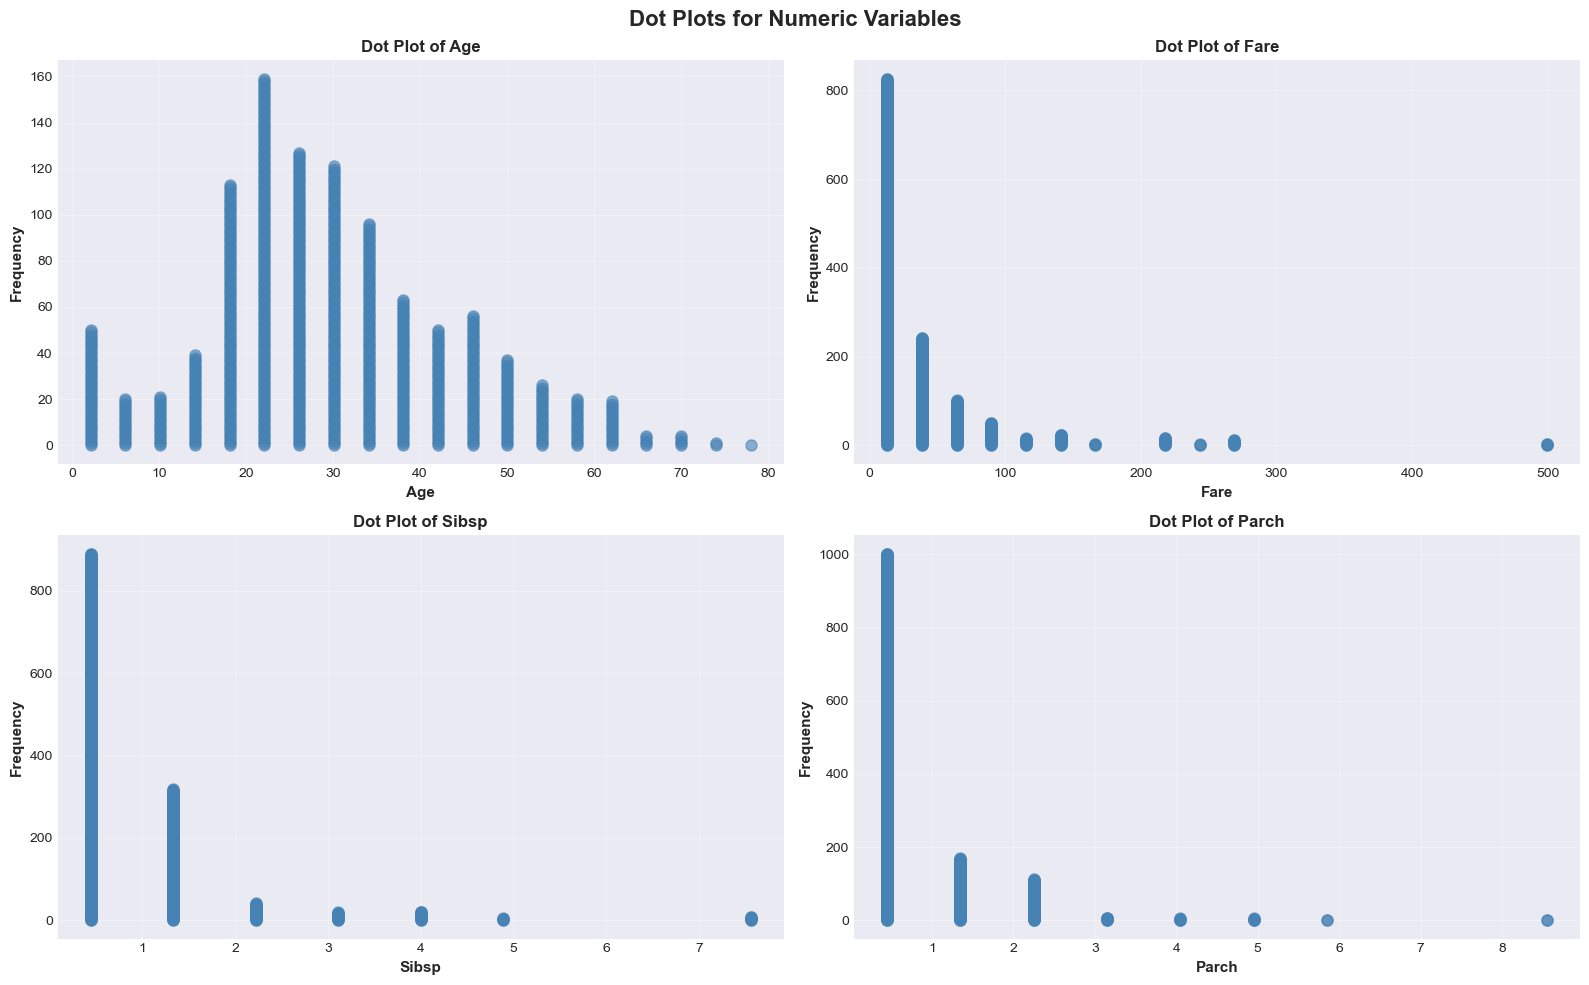

In [9]:
# Univariate Graphical: Dot Plot

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Dot Plots for Numeric Variables', fontsize=16, fontweight='bold')

dot_plot_vars = ['age', 'fare', 'sibsp', 'parch']

for idx, col in enumerate(dot_plot_vars):
    ax = axes[idx // 2, idx % 2]
    data = df[col].dropna()
    
    # Create bins for grouping
    if col in ['age', 'fare']:
        bins = 20
    else:
        bins = int(data.max() - data.min() + 1)
    
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Plot dots
    for i, (center, count) in enumerate(zip(bin_centers, counts)):
        ax.plot([center] * count, range(count), 'o', color='steelblue', markersize=8, alpha=0.6)
    
    ax.set_xlabel(col.capitalize(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'Dot Plot of {col.capitalize()}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

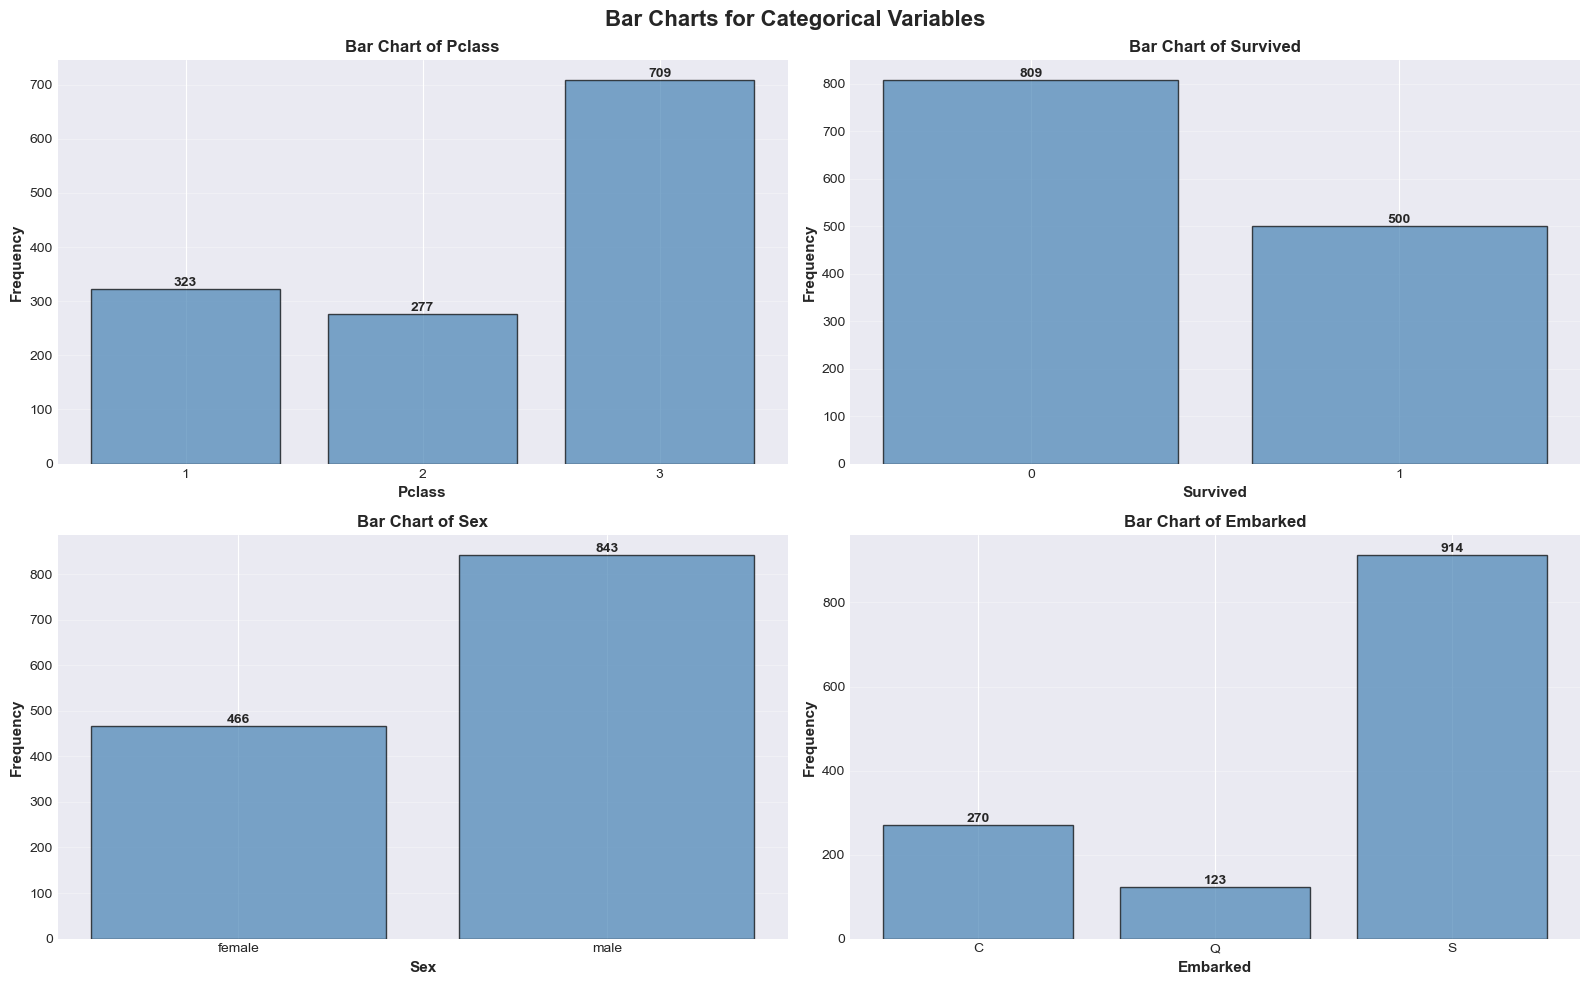

In [10]:
# Univariate Graphical: Bar Chart

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Bar Charts for Categorical Variables', fontsize=16, fontweight='bold')

bar_chart_vars = ['pclass', 'survived', 'sex', 'embarked']

for idx, col in enumerate(bar_chart_vars):
    ax = axes[idx // 2, idx % 2]
    
    value_counts = df[col].value_counts().sort_index()
    
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                   color='steelblue', edgecolor='black', alpha=0.7)
    
    ax.set_xlabel(col.capitalize(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'Bar Chart of {col.capitalize()}', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=0)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, value_counts.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(val)}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## 2. BIVARIATE ANALYSIS

### 2.1 Non-Graphical Methods

In [11]:
# Bivariate Non-Graphical: Correlation Coefficient and Covariance

print("="*80)
print("BIVARIATE ANALYSIS: CORRELATION COEFFICIENTS AND COVARIANCES")
print("="*80)

# Select pairs of numeric variables
numeric_pairs = [
    ('age', 'fare'),
    ('age', 'survived'),
    ('fare', 'survived'),
    ('sibsp', 'parch'),
    ('pclass', 'fare'),
    ('pclass', 'age')
]

for var1, var2 in numeric_pairs:
    # Remove missing values
    data_clean = df[[var1, var2]].dropna()
    
    if len(data_clean) > 0:
        # Correlation coefficient (Pearson)
        correlation = data_clean[var1].corr(data_clean[var2])
        
        # Covariance
        covariance = data_clean[var1].cov(data_clean[var2])
        
        print(f"\n{'-'*80}")
        print(f"{var1.upper()} vs {var2.upper()}")
        print(f"{'-'*80}")
        print(f"Correlation Coefficient (Pearson r): {correlation:.4f}")
        print(f"Covariance:                          {covariance:.4f}")
        
        # Interpretation
        if abs(correlation) < 0.3:
            strength = "Weak"
        elif abs(correlation) < 0.7:
            strength = "Moderate"
        else:
            strength = "Strong"
        
        direction = "Positive" if correlation > 0 else "Negative"
        print(f"Interpretation:                      {strength} {direction} relationship")

BIVARIATE ANALYSIS: CORRELATION COEFFICIENTS AND COVARIANCES

--------------------------------------------------------------------------------
AGE vs FARE
--------------------------------------------------------------------------------
Correlation Coefficient (Pearson r): 0.1787
Covariance:                          143.3398
Interpretation:                      Weak Positive relationship

--------------------------------------------------------------------------------
AGE vs SURVIVED
--------------------------------------------------------------------------------
Correlation Coefficient (Pearson r): -0.0555
Covariance:                          -0.3935
Interpretation:                      Weak Negative relationship

--------------------------------------------------------------------------------
FARE vs SURVIVED
--------------------------------------------------------------------------------
Correlation Coefficient (Pearson r): 0.2443
Covariance:                          6.1460
Interpret

In [12]:
# Bivariate Non-Graphical: Contingency Table

print("\n" + "="*80)
print("CONTINGENCY TABLES")
print("="*80)

# Contingency table: Survived vs Sex
print("\n" + "-"*80)
print("Contingency Table: SURVIVED vs SEX")
print("-"*80)
ct_sex = pd.crosstab(df['survived'], df['sex'], margins=True, margins_name='Total')
print(ct_sex)

# Chi-square test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['survived'], df['sex']))
print(f"\nChi-Square Test:")
print(f"  Chi2 Statistic: {chi2:.4f}")
print(f"  P-value:        {p_value:.4f}")
print(f"  Degrees of Freedom: {dof}")
print(f"  Significant:    {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")

# Contingency table: Survived vs Pclass
print("\n" + "-"*80)
print("Contingency Table: SURVIVED vs PCLASS")
print("-"*80)
ct_pclass = pd.crosstab(df['survived'], df['pclass'], margins=True, margins_name='Total')
print(ct_pclass)

chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['survived'], df['pclass']))
print(f"\nChi-Square Test:")
print(f"  Chi2 Statistic: {chi2:.4f}")
print(f"  P-value:        {p_value:.4f}")
print(f"  Degrees of Freedom: {dof}")
print(f"  Significant:    {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")

# Contingency table: Sex vs Pclass
print("\n" + "-"*80)
print("Contingency Table: SEX vs PCLASS")
print("-"*80)
ct_sex_pclass = pd.crosstab(df['sex'], df['pclass'], margins=True, margins_name='Total')
print(ct_sex_pclass)


CONTINGENCY TABLES

--------------------------------------------------------------------------------
Contingency Table: SURVIVED vs SEX
--------------------------------------------------------------------------------
sex       female  male  Total
survived                     
0            127   682    809
1            339   161    500
Total        466   843   1309

Chi-Square Test:
  Chi2 Statistic: 363.6179
  P-value:        0.0000
  Degrees of Freedom: 1
  Significant:    Yes (α=0.05)

--------------------------------------------------------------------------------
Contingency Table: SURVIVED vs PCLASS
--------------------------------------------------------------------------------
pclass      1    2    3  Total
survived                      
0         123  158  528    809
1         200  119  181    500
Total     323  277  709   1309

Chi-Square Test:
  Chi2 Statistic: 127.8592
  P-value:        0.0000
  Degrees of Freedom: 2
  Significant:    Yes (α=0.05)

-------------------------

In [13]:
# Bivariate Non-Graphical: Two-Sample t-test

print("\n" + "="*80)
print("TWO-SAMPLE T-TESTS")
print("="*80)

# T-test: Age by Survived
print("\n" + "-"*80)
print("Two-Sample t-test: AGE by SURVIVED")
print("-"*80)

age_survived = df[df['survived'] == 1]['age'].dropna()
age_died = df[df['survived'] == 0]['age'].dropna()

t_stat, p_value = ttest_ind(age_survived, age_died)

print(f"Group 1 (Survived): n={len(age_survived)}, mean={age_survived.mean():.2f}, std={age_survived.std():.2f}")
print(f"Group 2 (Died):     n={len(age_died)}, mean={age_died.mean():.2f}, std={age_died.std():.2f}")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value:     {p_value:.4f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")
print(f"Conclusion:  {'Ages differ significantly between survivors and non-survivors' if p_value < 0.05 else 'No significant age difference'}")

# T-test: Fare by Survived
print("\n" + "-"*80)
print("Two-Sample t-test: FARE by SURVIVED")
print("-"*80)

fare_survived = df[df['survived'] == 1]['fare'].dropna()
fare_died = df[df['survived'] == 0]['fare'].dropna()

t_stat, p_value = ttest_ind(fare_survived, fare_died)

print(f"Group 1 (Survived): n={len(fare_survived)}, mean={fare_survived.mean():.2f}, std={fare_survived.std():.2f}")
print(f"Group 2 (Died):     n={len(fare_died)}, mean={fare_died.mean():.2f}, std={fare_died.std():.2f}")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value:     {p_value:.4f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")
print(f"Conclusion:  {'Fares differ significantly between survivors and non-survivors' if p_value < 0.05 else 'No significant fare difference'}")

# T-test: Age by Sex
print("\n" + "-"*80)
print("Two-Sample t-test: AGE by SEX")
print("-"*80)

age_male = df[df['sex'] == 'male']['age'].dropna()
age_female = df[df['sex'] == 'female']['age'].dropna()

t_stat, p_value = ttest_ind(age_male, age_female)

print(f"Group 1 (Male):   n={len(age_male)}, mean={age_male.mean():.2f}, std={age_male.std():.2f}")
print(f"Group 2 (Female): n={len(age_female)}, mean={age_female.mean():.2f}, std={age_female.std():.2f}")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value:     {p_value:.4f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")
print(f"Conclusion:  {'Ages differ significantly between males and females' if p_value < 0.05 else 'No significant age difference'}")


TWO-SAMPLE T-TESTS

--------------------------------------------------------------------------------
Two-Sample t-test: AGE by SURVIVED
--------------------------------------------------------------------------------
Group 1 (Survived): n=427, mean=28.92, std=15.06
Group 2 (Died):     n=619, mean=30.55, std=13.92

T-statistic: -1.7964
P-value:     0.0727
Significant: No (α=0.05)
Conclusion:  No significant age difference

--------------------------------------------------------------------------------
Two-Sample t-test: FARE by SURVIVED
--------------------------------------------------------------------------------
Group 1 (Survived): n=500, mean=49.36, std=68.65
Group 2 (Died):     n=808, mean=23.35, std=34.15

T-statistic: 9.1032
P-value:     0.0000
Significant: Yes (α=0.05)
Conclusion:  Fares differ significantly between survivors and non-survivors

--------------------------------------------------------------------------------
Two-Sample t-test: AGE by SEX
----------------------

### 2.2 Graphical Methods

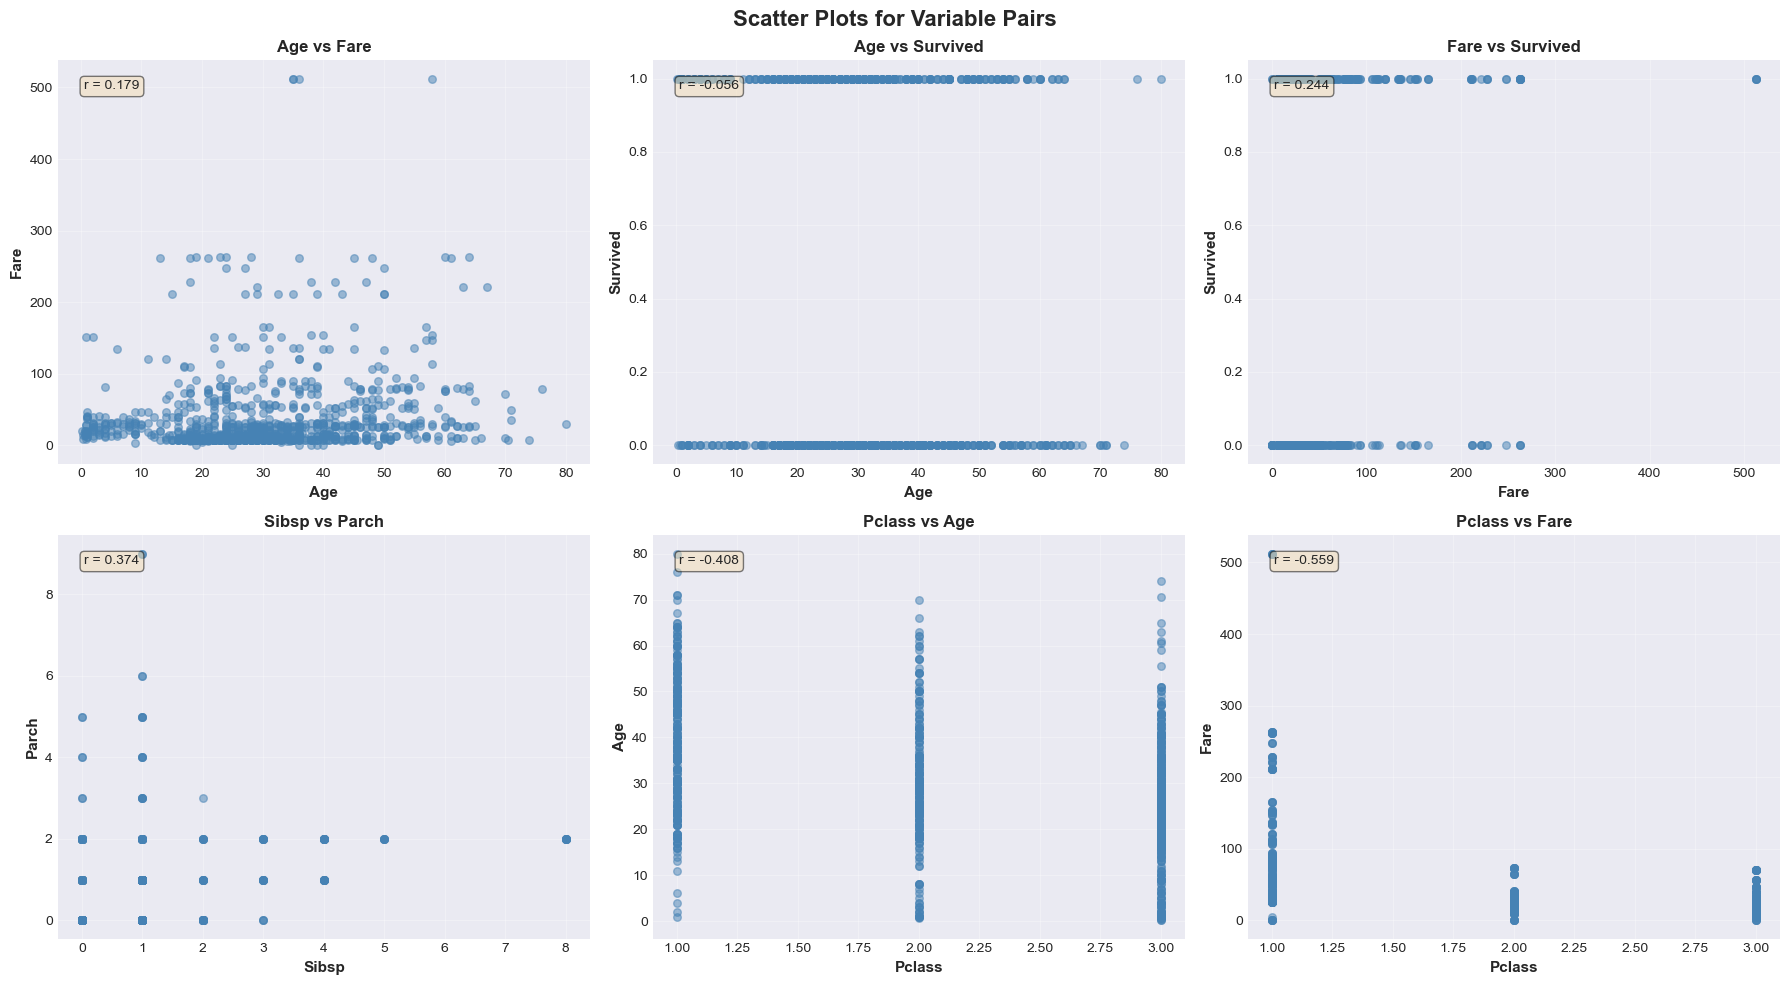

In [14]:
# Bivariate Graphical: Scatter Plot

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Scatter Plots for Variable Pairs', fontsize=16, fontweight='bold')

scatter_pairs = [
    ('age', 'fare'),
    ('age', 'survived'),
    ('fare', 'survived'),
    ('sibsp', 'parch'),
    ('pclass', 'age'),
    ('pclass', 'fare')
]

for idx, (var1, var2) in enumerate(scatter_pairs):
    ax = axes[idx // 3, idx % 3]
    
    data_clean = df[[var1, var2]].dropna()
    
    ax.scatter(data_clean[var1], data_clean[var2], alpha=0.5, s=30, color='steelblue')
    ax.set_xlabel(var1.capitalize(), fontsize=11, fontweight='bold')
    ax.set_ylabel(var2.capitalize(), fontsize=11, fontweight='bold')
    ax.set_title(f'{var1.capitalize()} vs {var2.capitalize()}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr = data_clean[var1].corr(data_clean[var2])
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

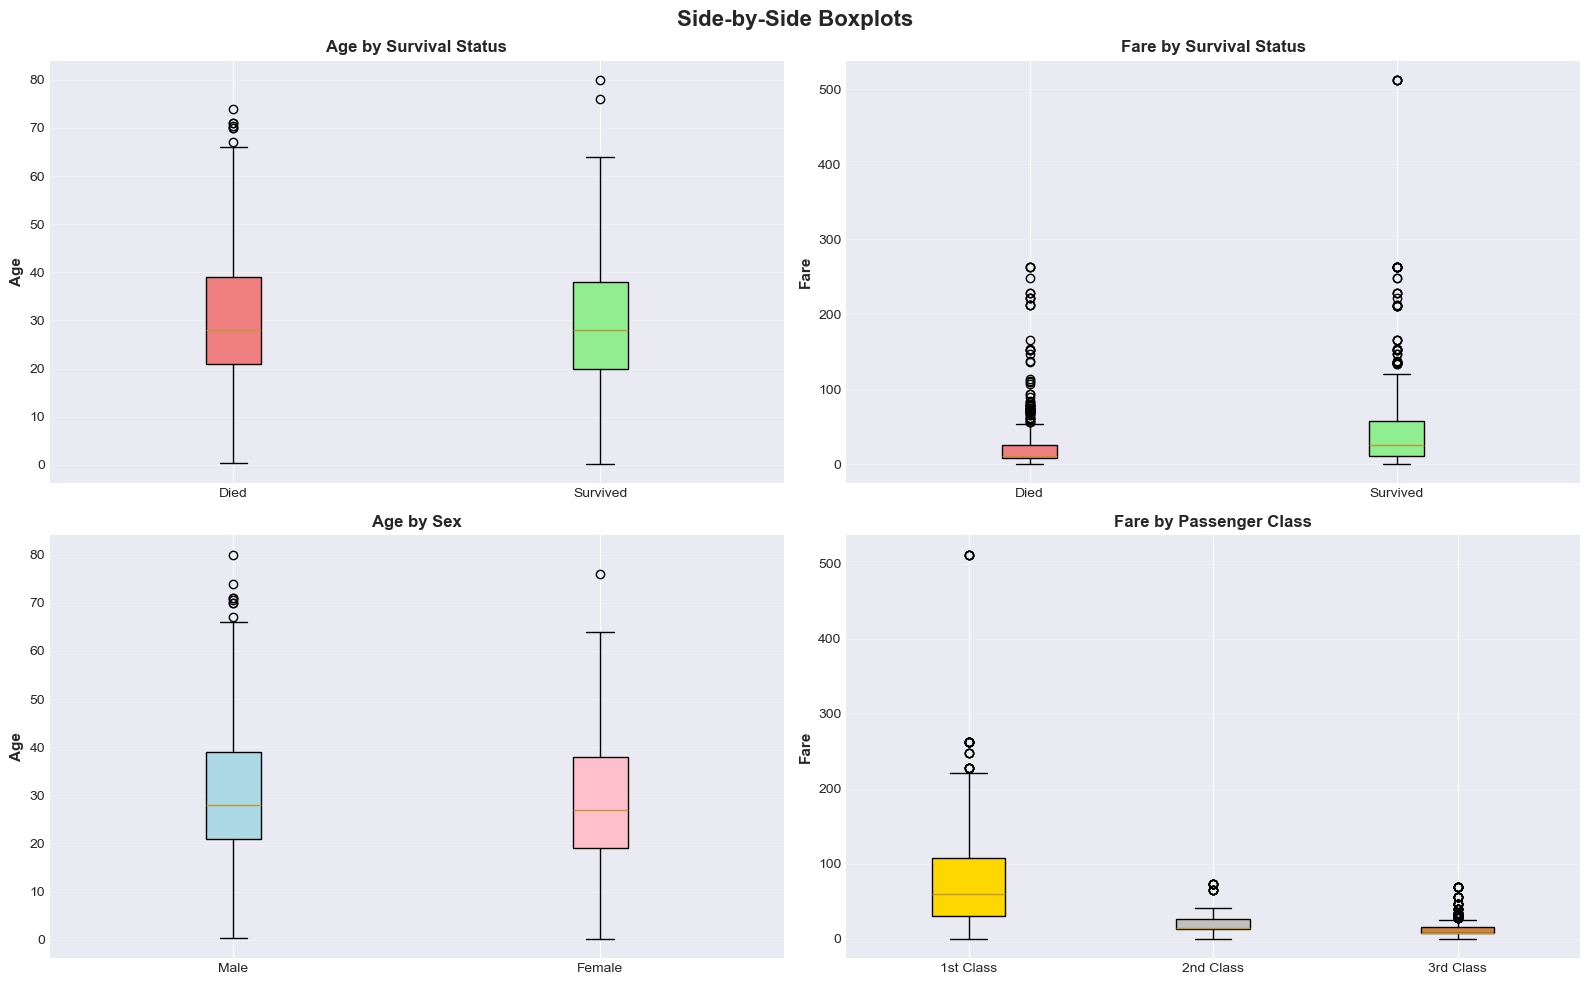

In [15]:
# Bivariate Graphical: Side-by-Side Boxplots

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Side-by-Side Boxplots', fontsize=16, fontweight='bold')

# Age by Survived
ax = axes[0, 0]
data_survived = [df[df['survived'] == 0]['age'].dropna(), 
                  df[df['survived'] == 1]['age'].dropna()]
bp = ax.boxplot(data_survived, labels=['Died', 'Survived'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightcoral', 'lightgreen']):
    patch.set_facecolor(color)
ax.set_ylabel('Age', fontsize=11, fontweight='bold')
ax.set_title('Age by Survival Status', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Fare by Survived
ax = axes[0, 1]
data_survived = [df[df['survived'] == 0]['fare'].dropna(), 
                  df[df['survived'] == 1]['fare'].dropna()]
bp = ax.boxplot(data_survived, labels=['Died', 'Survived'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightcoral', 'lightgreen']):
    patch.set_facecolor(color)
ax.set_ylabel('Fare', fontsize=11, fontweight='bold')
ax.set_title('Fare by Survival Status', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Age by Sex
ax = axes[1, 0]
data_sex = [df[df['sex'] == 'male']['age'].dropna(), 
            df[df['sex'] == 'female']['age'].dropna()]
bp = ax.boxplot(data_sex, labels=['Male', 'Female'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'pink']):
    patch.set_facecolor(color)
ax.set_ylabel('Age', fontsize=11, fontweight='bold')
ax.set_title('Age by Sex', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Fare by Pclass
ax = axes[1, 1]
data_pclass = [df[df['pclass'] == 1]['fare'].dropna(),
               df[df['pclass'] == 2]['fare'].dropna(),
               df[df['pclass'] == 3]['fare'].dropna()]
bp = ax.boxplot(data_pclass, labels=['1st Class', '2nd Class', '3rd Class'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['gold', 'silver', 'peru']):
    patch.set_facecolor(color)
ax.set_ylabel('Fare', fontsize=11, fontweight='bold')
ax.set_title('Fare by Passenger Class', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

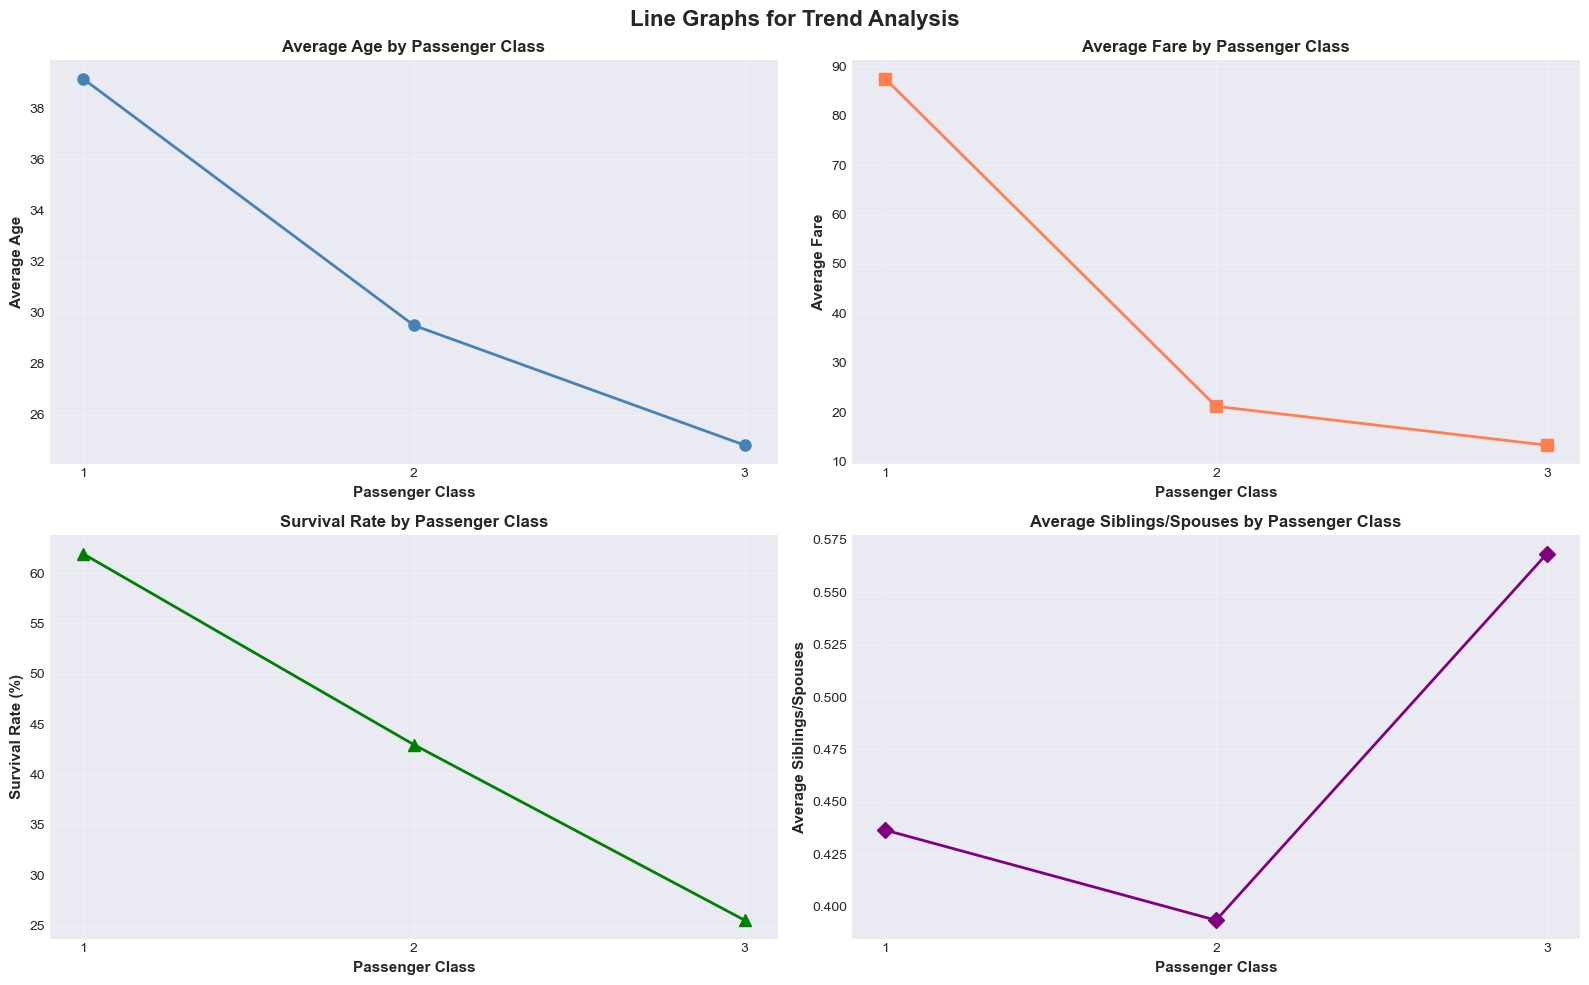

In [16]:
# Bivariate Graphical: Line Graph

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Line Graphs for Trend Analysis', fontsize=16, fontweight='bold')

# Average Age by Pclass
ax = axes[0, 0]
age_by_pclass = df.groupby('pclass')['age'].mean()
ax.plot(age_by_pclass.index, age_by_pclass.values, marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xlabel('Passenger Class', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Age', fontsize=11, fontweight='bold')
ax.set_title('Average Age by Passenger Class', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks([1, 2, 3])

# Average Fare by Pclass
ax = axes[0, 1]
fare_by_pclass = df.groupby('pclass')['fare'].mean()
ax.plot(fare_by_pclass.index, fare_by_pclass.values, marker='s', linewidth=2, markersize=8, color='coral')
ax.set_xlabel('Passenger Class', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Fare', fontsize=11, fontweight='bold')
ax.set_title('Average Fare by Passenger Class', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks([1, 2, 3])

# Survival Rate by Pclass
ax = axes[1, 0]
survival_by_pclass = df.groupby('pclass')['survived'].mean() * 100
ax.plot(survival_by_pclass.index, survival_by_pclass.values, marker='^', linewidth=2, markersize=8, color='green')
ax.set_xlabel('Passenger Class', fontsize=11, fontweight='bold')
ax.set_ylabel('Survival Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Survival Rate by Passenger Class', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks([1, 2, 3])

# Average Siblings/Spouses by Pclass
ax = axes[1, 1]
sibsp_by_pclass = df.groupby('pclass')['sibsp'].mean()
ax.plot(sibsp_by_pclass.index, sibsp_by_pclass.values, marker='D', linewidth=2, markersize=8, color='purple')
ax.set_xlabel('Passenger Class', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Siblings/Spouses', fontsize=11, fontweight='bold')
ax.set_title('Average Siblings/Spouses by Passenger Class', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

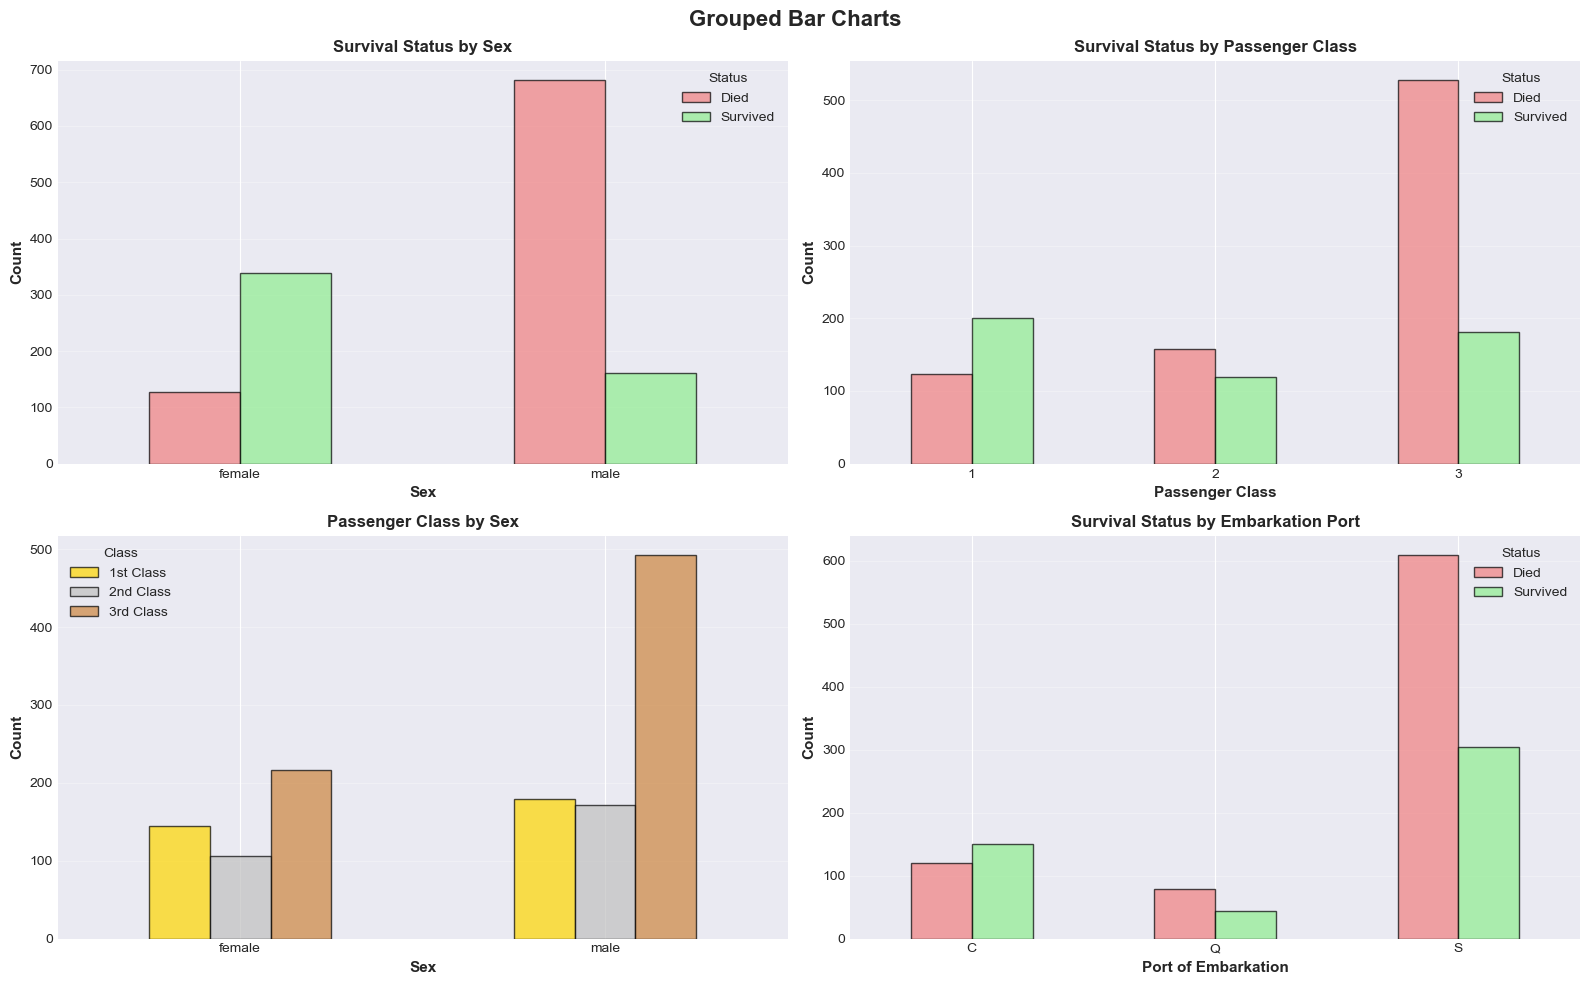

In [17]:
# Bivariate Graphical: Grouped Bar Chart

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Grouped Bar Charts', fontsize=16, fontweight='bold')

# Survival by Sex
ax = axes[0, 0]
survival_sex = pd.crosstab(df['sex'], df['survived'])
survival_sex.plot(kind='bar', ax=ax, color=['lightcoral', 'lightgreen'], edgecolor='black', alpha=0.7)
ax.set_xlabel('Sex', fontsize=11, fontweight='bold')
ax.set_ylabel('Count', fontsize=11, fontweight='bold')
ax.set_title('Survival Status by Sex', fontsize=12, fontweight='bold')
ax.legend(['Died', 'Survived'], title='Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

# Survival by Pclass
ax = axes[0, 1]
survival_pclass = pd.crosstab(df['pclass'], df['survived'])
survival_pclass.plot(kind='bar', ax=ax, color=['lightcoral', 'lightgreen'], edgecolor='black', alpha=0.7)
ax.set_xlabel('Passenger Class', fontsize=11, fontweight='bold')
ax.set_ylabel('Count', fontsize=11, fontweight='bold')
ax.set_title('Survival Status by Passenger Class', fontsize=12, fontweight='bold')
ax.legend(['Died', 'Survived'], title='Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

# Pclass by Sex
ax = axes[1, 0]
pclass_sex = pd.crosstab(df['sex'], df['pclass'])
pclass_sex.plot(kind='bar', ax=ax, color=['gold', 'silver', 'peru'], edgecolor='black', alpha=0.7)
ax.set_xlabel('Sex', fontsize=11, fontweight='bold')
ax.set_ylabel('Count', fontsize=11, fontweight='bold')
ax.set_title('Passenger Class by Sex', fontsize=12, fontweight='bold')
ax.legend(['1st Class', '2nd Class', '3rd Class'], title='Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

# Embarked by Survived
ax = axes[1, 1]
embarked_survival = pd.crosstab(df['embarked'], df['survived'])
embarked_survival.plot(kind='bar', ax=ax, color=['lightcoral', 'lightgreen'], edgecolor='black', alpha=0.7)
ax.set_xlabel('Port of Embarkation', fontsize=11, fontweight='bold')
ax.set_ylabel('Count', fontsize=11, fontweight='bold')
ax.set_title('Survival Status by Embarkation Port', fontsize=12, fontweight='bold')
ax.legend(['Died', 'Survived'], title='Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. MULTIVARIATE ANALYSIS

### 3.1 Non-Graphical Methods

In [18]:
# Multivariate Non-Graphical: Correlation Matrix

print("="*80)
print("CORRELATION MATRIX")
print("="*80)

# Select numeric columns for correlation matrix
numeric_data = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']].dropna()

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

print("\nPearson Correlation Matrix:")
print(correlation_matrix.round(4))

print("\n" + "="*80)
print("CORRELATION MATRIX INTERPRETATION")
print("="*80)

# Identify strong correlations (|r| > 0.5)
print("\nStrong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"  {var1} <-> {var2}: r = {corr_value:.4f}")

CORRELATION MATRIX

Pearson Correlation Matrix:
          pclass  survived     age   sibsp   parch    fare
pclass    1.0000   -0.3200 -0.4111  0.0477  0.0177 -0.5653
survived -0.3200    1.0000 -0.0540 -0.0127  0.1141  0.2492
age      -0.4111   -0.0540  1.0000 -0.2431 -0.1502  0.1787
sibsp     0.0477   -0.0127 -0.2431  1.0000  0.3743  0.1412
parch     0.0177    0.1141 -0.1502  0.3743  1.0000  0.2167
fare     -0.5653    0.2492  0.1787  0.1412  0.2167  1.0000

CORRELATION MATRIX INTERPRETATION

Strong Correlations (|r| > 0.5):
  pclass <-> fare: r = -0.5653


In [19]:
# Multivariate Non-Graphical: Descriptive Statistics Table

print("="*80)
print("COMPREHENSIVE DESCRIPTIVE STATISTICS TABLE")
print("="*80)

# Generate comprehensive descriptive statistics
desc_stats = df[['age', 'sibsp', 'parch', 'fare', 'pclass', 'survived']].describe()

# Add additional statistics
additional_stats = pd.DataFrame({
    'age': [df['age'].var(), df['age'].skew(), df['age'].kurtosis()],
    'sibsp': [df['sibsp'].var(), df['sibsp'].skew(), df['sibsp'].kurtosis()],
    'parch': [df['parch'].var(), df['parch'].skew(), df['parch'].kurtosis()],
    'fare': [df['fare'].var(), df['fare'].skew(), df['fare'].kurtosis()],
    'pclass': [df['pclass'].var(), df['pclass'].skew(), df['pclass'].kurtosis()],
    'survived': [df['survived'].var(), df['survived'].skew(), df['survived'].kurtosis()]
}, index=['variance', 'skewness', 'kurtosis'])

# Combine all statistics
full_stats = pd.concat([desc_stats, additional_stats])

print("\n", full_stats.round(4))

print("\n" + "="*80)
print("GROUPED DESCRIPTIVE STATISTICS")
print("="*80)

# Descriptive stats by Survived
print("\nStatistics by Survival Status:")
print(df.groupby('survived')[['age', 'fare', 'sibsp', 'parch']].describe().round(2))

print("\n" + "-"*80)
print("Statistics by Sex:")
print(df.groupby('sex')[['age', 'fare', 'sibsp', 'parch']].describe().round(2))

print("\n" + "-"*80)
print("Statistics by Passenger Class:")
print(df.groupby('pclass')[['age', 'fare', 'sibsp', 'parch']].describe().round(2))

COMPREHENSIVE DESCRIPTIVE STATISTICS TABLE

                 age      sibsp      parch       fare     pclass   survived
count     1046.0000  1309.0000  1309.0000  1308.0000  1309.0000  1309.0000
mean        29.8811     0.4989     0.3850    33.2955     2.2949     0.3820
std         14.4135     1.0417     0.8656    51.7587     0.8378     0.4861
min          0.1700     0.0000     0.0000     0.0000     1.0000     0.0000
25%         21.0000     0.0000     0.0000     7.8958     2.0000     0.0000
50%         28.0000     0.0000     0.0000    14.4542     3.0000     0.0000
75%         39.0000     1.0000     0.0000    31.2750     3.0000     1.0000
max         80.0000     8.0000     9.0000   512.3292     3.0000     1.0000
variance   207.7488     1.0851     0.7492  2678.9597     0.7020     0.2362
skewness     0.4077     3.8442     3.6691     4.3677    -0.5986     0.4864
kurtosis     0.1469    20.0433    21.5411    27.0280    -1.3151    -1.7661

GROUPED DESCRIPTIVE STATISTICS

Statistics by Survival

In [20]:
# Multivariate Non-Graphical: MANOVA (Multivariate Analysis of Variance)

print("="*80)
print("MANOVA (MULTIVARIATE ANALYSIS OF VARIANCE)")
print("="*80)

# Prepare data for MANOVA - remove missing values
manova_data = df[['age', 'fare', 'sibsp', 'parch', 'survived']].dropna()

# MANOVA: Effect of survival status on multiple dependent variables
print("\n" + "-"*80)
print("MANOVA: Effect of Survival Status on Age, Fare, Sibsp, and Parch")
print("-"*80)

try:
    manova = MANOVA.from_formula('age + fare + sibsp + parch ~ survived', data=manova_data)
    manova_results = manova.mv_test()
    print(manova_results)
except Exception as e:
    print(f"MANOVA Error: {e}")
    print("Performing alternative multivariate test...")

# Alternative: Individual ANOVAs for each variable
print("\n" + "="*80)
print("ONE-WAY ANOVA FOR EACH VARIABLE BY SURVIVAL STATUS")
print("="*80)

from scipy.stats import f_oneway

variables = ['age', 'fare', 'sibsp', 'parch']

for var in variables:
    groups = [df[df['survived'] == i][var].dropna() for i in df['survived'].unique()]
    f_stat, p_value = f_oneway(*groups)
    
    print(f"\n{var.upper()}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value:     {p_value:.4f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")

MANOVA (MULTIVARIATE ANALYSIS OF VARIANCE)

--------------------------------------------------------------------------------
MANOVA: Effect of Survival Status on Age, Fare, Sibsp, and Parch
--------------------------------------------------------------------------------
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.2216 4.0000 1040.0000 913.3179 0.0000
         Pillai's trace 0.7784 4.0000 1040.0000 913.3179 0.0000
 Hotelling-Lawley trace 3.5128 4.0000 1040.0000 913.3179 0.0000
    Roy's greatest root 3.5128 4.0000 1040.0000 913.3179 0.0000
---------------------------------------------------------------
                                                               
--------------------------------------------

In [21]:
# Multivariate Non-Graphical: Multiple Regression

print("="*80)
print("MULTIPLE REGRESSION ANALYSIS")
print("="*80)

# Prepare data for regression
regression_data = df[['survived', 'age', 'fare', 'sibsp', 'parch', 'pclass']].dropna()

# Model 1: Predict Survived from multiple variables
print("\n" + "-"*80)
print("Model 1: Predicting Survival")
print("-"*80)

X1 = regression_data[['age', 'fare', 'sibsp', 'parch', 'pclass']]
y1 = regression_data['survived']

model1 = LinearRegression()
model1.fit(X1, y1)

print(f"\nR² Score: {model1.score(X1, y1):.4f}")
print(f"Intercept: {model1.intercept_:.4f}")
print("\nCoefficients:")
for feature, coef in zip(X1.columns, model1.coef_):
    print(f"  {feature:10s}: {coef:8.4f}")

# Model 2: Predict Fare from other variables
print("\n" + "-"*80)
print("Model 2: Predicting Fare")
print("-"*80)

X2 = regression_data[['age', 'survived', 'sibsp', 'parch', 'pclass']]
y2 = regression_data['fare']

model2 = LinearRegression()
model2.fit(X2, y2)

print(f"\nR² Score: {model2.score(X2, y2):.4f}")
print(f"Intercept: {model2.intercept_:.4f}")
print("\nCoefficients:")
for feature, coef in zip(X2.columns, model2.coef_):
    print(f"  {feature:10s}: {coef:8.4f}")

# Model 3: Predict Age from other variables
print("\n" + "-"*80)
print("Model 3: Predicting Age")
print("-"*80)

X3 = regression_data[['survived', 'fare', 'sibsp', 'parch', 'pclass']]
y3 = regression_data['age']

model3 = LinearRegression()
model3.fit(X3, y3)

print(f"\nR² Score: {model3.score(X3, y3):.4f}")
print(f"Intercept: {model3.intercept_:.4f}")
print("\nCoefficients:")
for feature, coef in zip(X3.columns, model3.coef_):
    print(f"  {feature:10s}: {coef:8.4f}")

print("\n" + "="*80)
print("INTERPRETATION")
print("="*80)
print("R² Score indicates the proportion of variance in the dependent variable")
print("that is explained by the independent variables.")
print("Coefficients show the change in the dependent variable for a one-unit")
print("change in each independent variable, holding others constant.")

MULTIPLE REGRESSION ANALYSIS

--------------------------------------------------------------------------------
Model 1: Predicting Survival
--------------------------------------------------------------------------------

R² Score: 0.1621
Intercept: 1.0952

Coefficients:
  age       :  -0.0078
  fare      :   0.0006
  sibsp     :  -0.0544
  parch     :   0.0638
  pclass    :  -0.2164

--------------------------------------------------------------------------------
Model 2: Predicting Fare
--------------------------------------------------------------------------------

R² Score: 0.3814
Intercept: 106.3046

Coefficients:
  age       :   0.0230
  survived  :   5.9520
  sibsp     :   6.1706
  parch     :  12.1815
  pclass    : -36.6945

--------------------------------------------------------------------------------
Model 3: Predicting Age
--------------------------------------------------------------------------------

R² Score: 0.2586
Intercept: 51.5302

Coefficients:
  survived  :  -5.

### 3.2 Graphical Methods

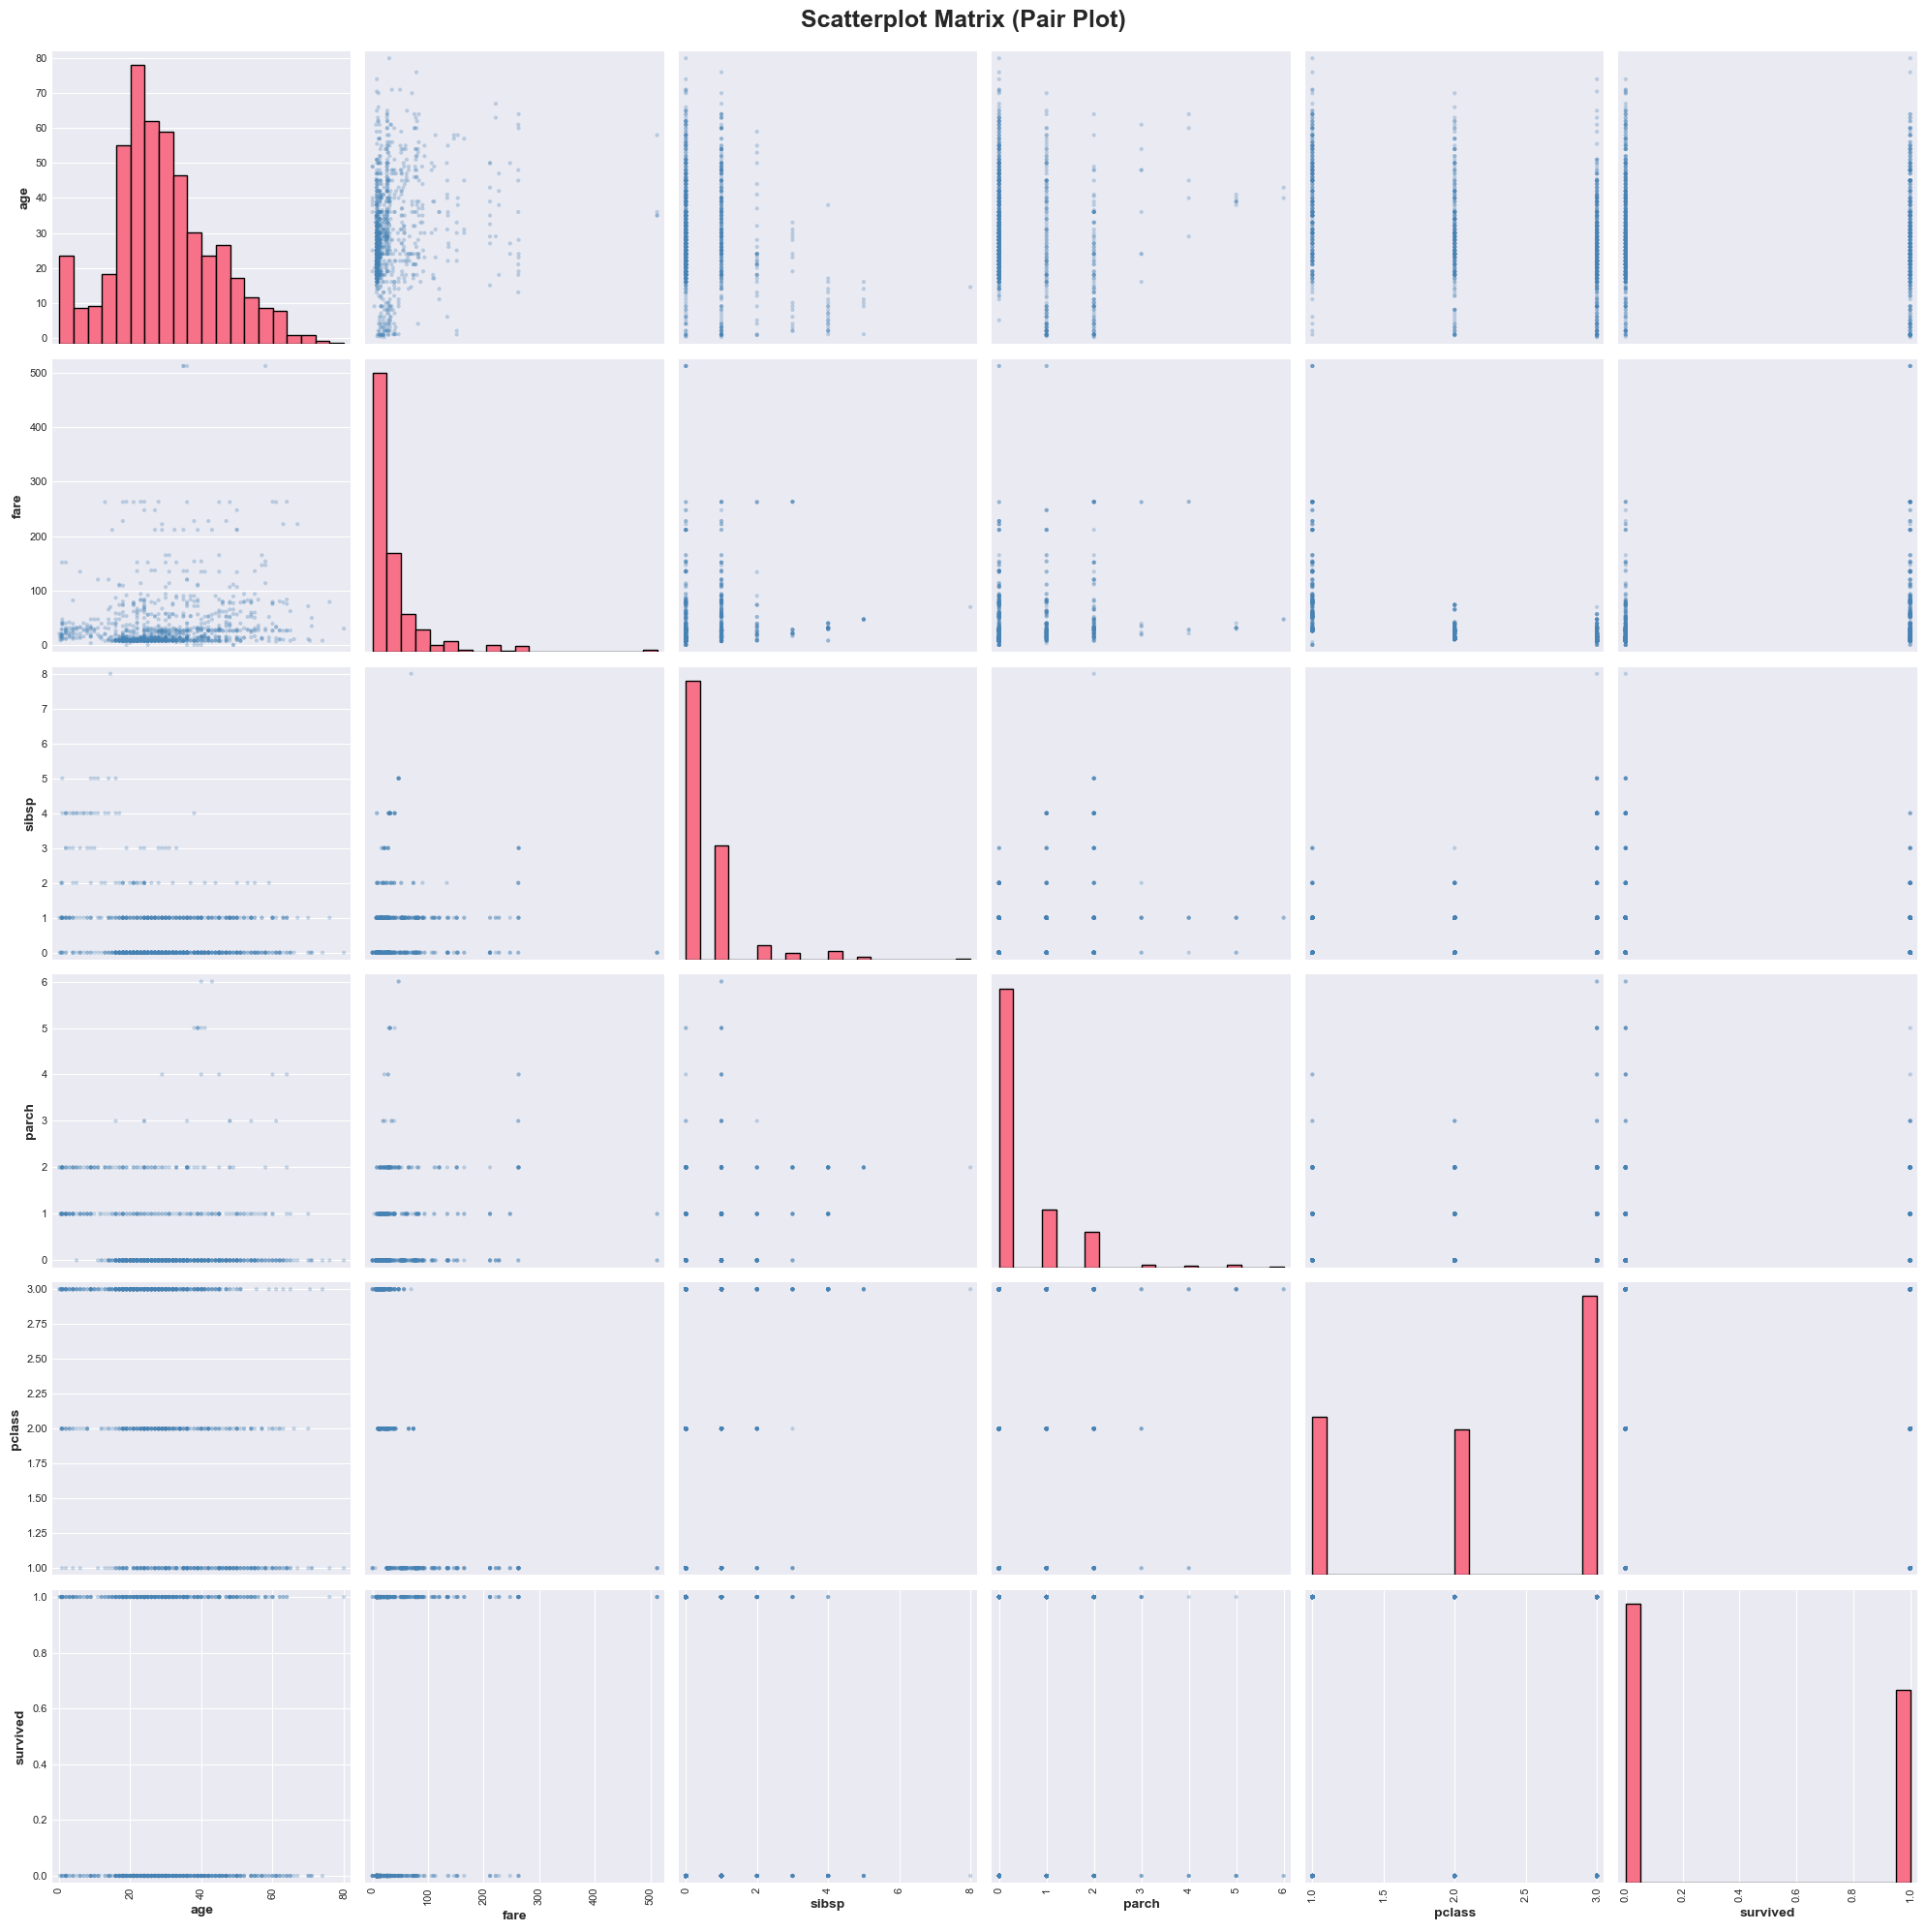

In [22]:
# Multivariate Graphical: Scatterplot Matrix (Pair Plot)

from pandas.plotting import scatter_matrix

# Select variables for scatter matrix
scatter_vars = ['age', 'fare', 'sibsp', 'parch', 'pclass', 'survived']
scatter_data = df[scatter_vars].dropna()

# Create scatter matrix
fig, axes = plt.subplots(6, 6, figsize=(20, 20))
fig.suptitle('Scatterplot Matrix (Pair Plot)', fontsize=18, fontweight='bold', y=0.995)

scatter_matrix(scatter_data, ax=axes, alpha=0.3, figsize=(20, 20), diagonal='hist', 
               hist_kwds={'bins': 20, 'edgecolor': 'black'}, color='steelblue')

# Improve readability
for i in range(6):
    for j in range(6):
        if i == 5:
            axes[i, j].set_xlabel(scatter_vars[j], fontsize=10, fontweight='bold')
        else:
            axes[i, j].set_xlabel('')
        
        if j == 0:
            axes[i, j].set_ylabel(scatter_vars[i], fontsize=10, fontweight='bold')
        else:
            axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()

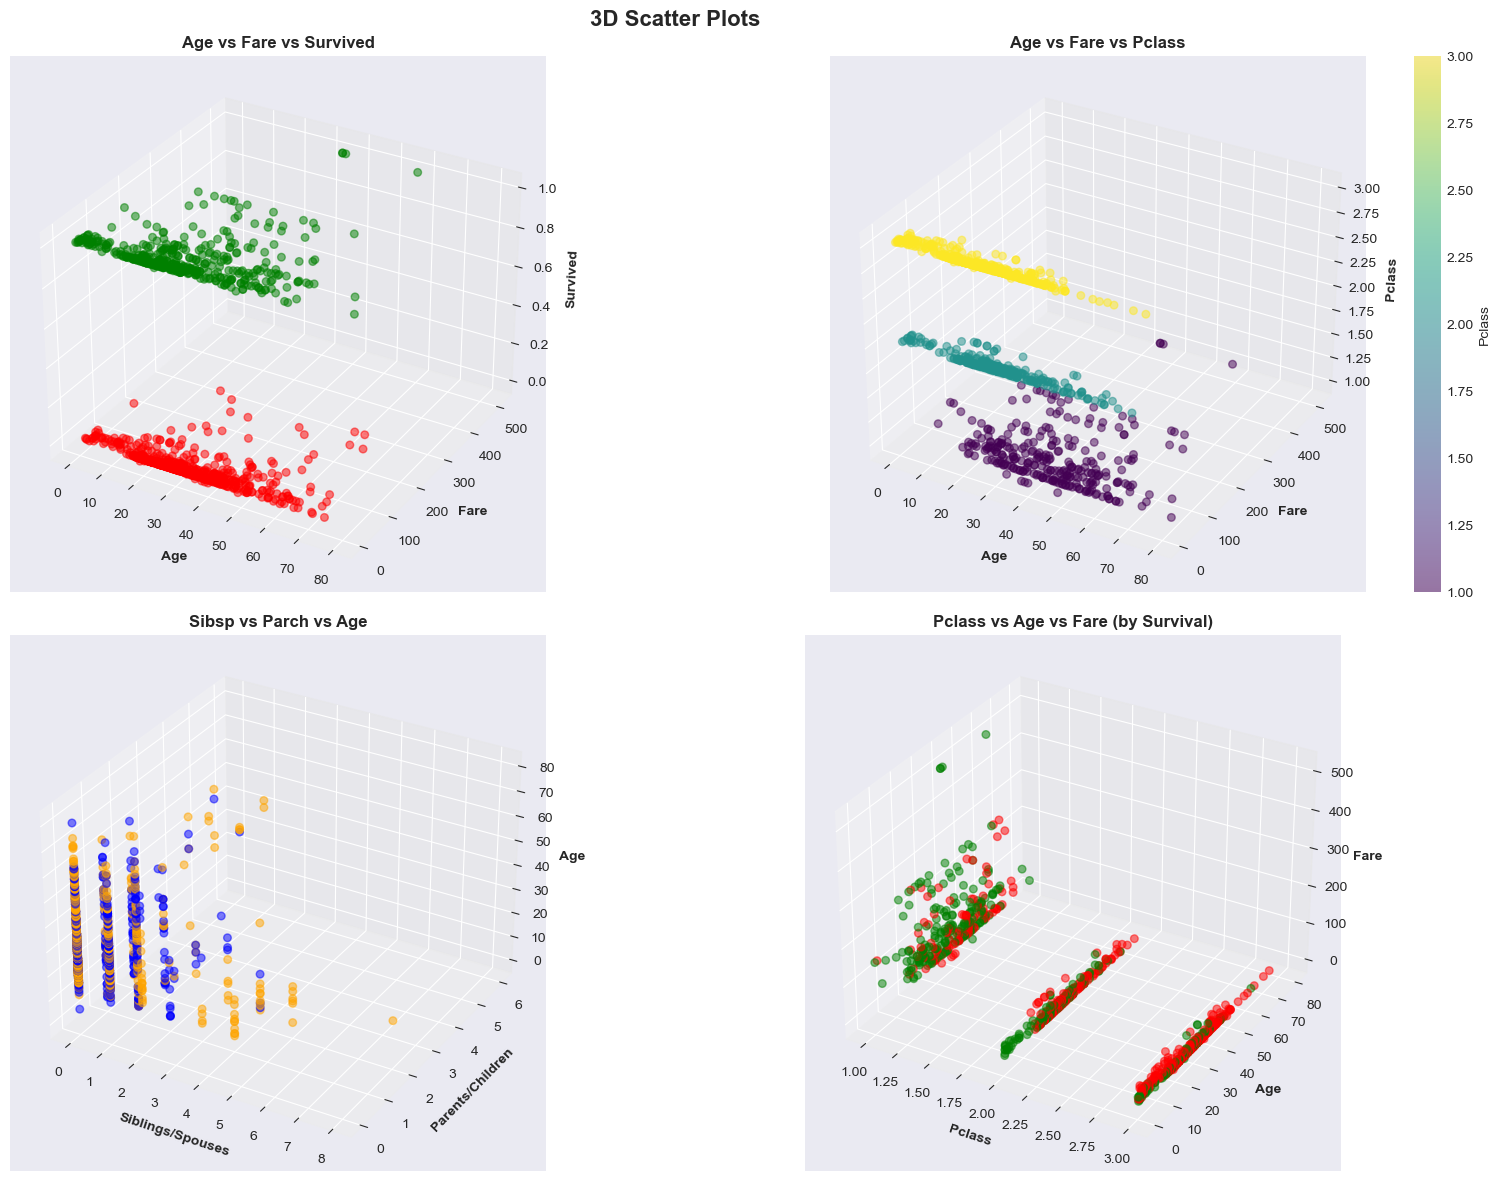

In [23]:
# Multivariate Graphical: 3D Scatter Plot

fig = plt.figure(figsize=(18, 12))
fig.suptitle('3D Scatter Plots', fontsize=16, fontweight='bold')

# 3D Plot 1: Age, Fare, Survived
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
data_3d = df[['age', 'fare', 'survived']].dropna()
colors = ['red' if s == 0 else 'green' for s in data_3d['survived']]
ax1.scatter(data_3d['age'], data_3d['fare'], data_3d['survived'], 
            c=colors, marker='o', alpha=0.5, s=30)
ax1.set_xlabel('Age', fontsize=10, fontweight='bold')
ax1.set_ylabel('Fare', fontsize=10, fontweight='bold')
ax1.set_zlabel('Survived', fontsize=10, fontweight='bold')
ax1.set_title('Age vs Fare vs Survived', fontsize=12, fontweight='bold')

# 3D Plot 2: Age, Fare, Pclass
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
data_3d = df[['age', 'fare', 'pclass']].dropna()
colors = data_3d['pclass']
scatter = ax2.scatter(data_3d['age'], data_3d['fare'], data_3d['pclass'], 
                      c=colors, marker='o', alpha=0.5, s=30, cmap='viridis')
ax2.set_xlabel('Age', fontsize=10, fontweight='bold')
ax2.set_ylabel('Fare', fontsize=10, fontweight='bold')
ax2.set_zlabel('Pclass', fontsize=10, fontweight='bold')
ax2.set_title('Age vs Fare vs Pclass', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax2, label='Pclass')

# 3D Plot 3: Sibsp, Parch, Age
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
data_3d = df[['sibsp', 'parch', 'age']].dropna()
colors = ['blue' if s == 1 else 'orange' for s in df.loc[data_3d.index, 'survived']]
ax3.scatter(data_3d['sibsp'], data_3d['parch'], data_3d['age'], 
            c=colors, marker='o', alpha=0.5, s=30)
ax3.set_xlabel('Siblings/Spouses', fontsize=10, fontweight='bold')
ax3.set_ylabel('Parents/Children', fontsize=10, fontweight='bold')
ax3.set_zlabel('Age', fontsize=10, fontweight='bold')
ax3.set_title('Sibsp vs Parch vs Age', fontsize=12, fontweight='bold')

# 3D Plot 4: Pclass, Age, Fare (colored by survival)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
data_3d = df[['pclass', 'age', 'fare']].dropna()
colors = ['red' if s == 0 else 'green' for s in df.loc[data_3d.index, 'survived']]
ax4.scatter(data_3d['pclass'], data_3d['age'], data_3d['fare'], 
            c=colors, marker='o', alpha=0.5, s=30)
ax4.set_xlabel('Pclass', fontsize=10, fontweight='bold')
ax4.set_ylabel('Age', fontsize=10, fontweight='bold')
ax4.set_zlabel('Fare', fontsize=10, fontweight='bold')
ax4.set_title('Pclass vs Age vs Fare (by Survival)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

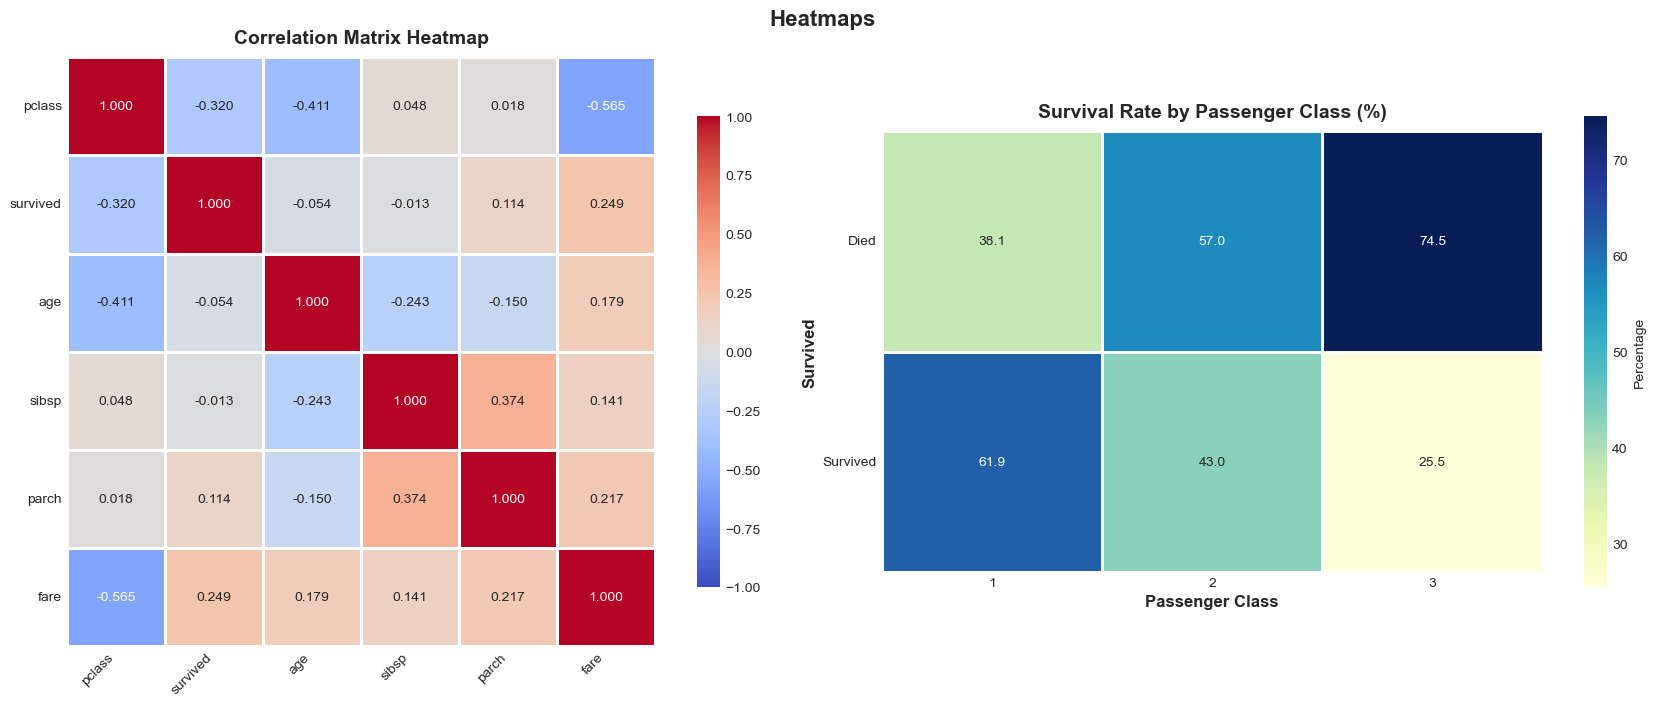

In [24]:
# Multivariate Graphical: Heatmap (Correlation Matrix)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Heatmaps', fontsize=16, fontweight='bold')

# Heatmap 1: Correlation Matrix
ax1 = axes[0]
numeric_data = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']].dropna()
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold', pad=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Heatmap 2: Contingency Table (Survived vs Pclass)
ax2 = axes[1]
contingency = pd.crosstab(df['survived'], df['pclass'], normalize='columns') * 100

sns.heatmap(contingency, annot=True, fmt='.1f', cmap='YlGnBu', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8, "label": "Percentage"},
            ax=ax2)
ax2.set_title('Survival Rate by Passenger Class (%)', fontsize=14, fontweight='bold', pad=10)
ax2.set_xlabel('Passenger Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('Survived', fontsize=12, fontweight='bold')
ax2.set_yticklabels(['Died', 'Survived'], rotation=0)

plt.tight_layout()
plt.show()

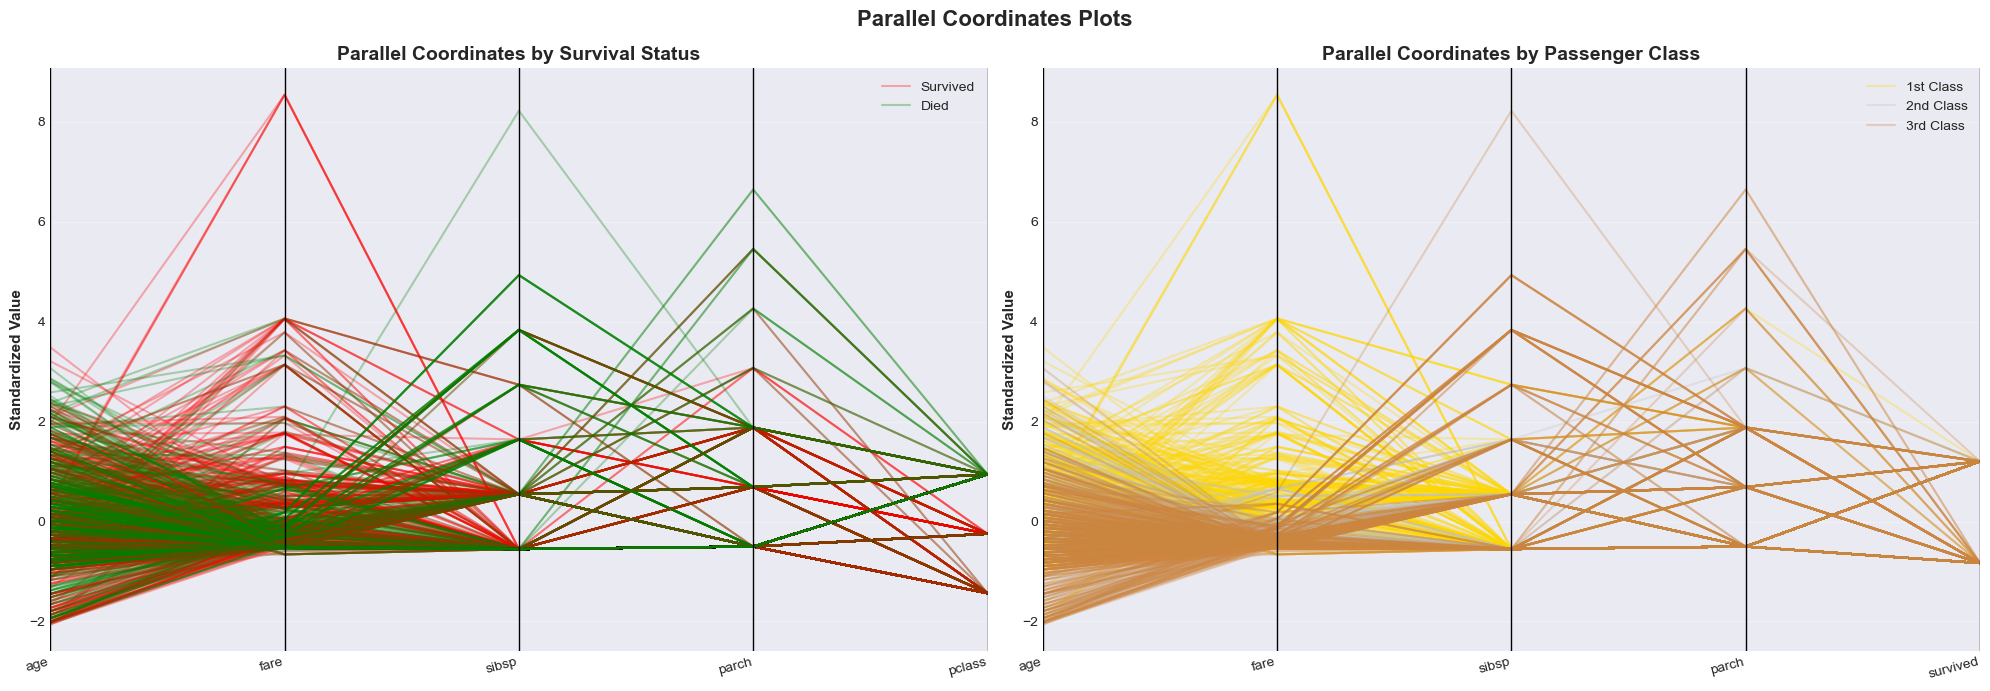

In [25]:
# Multivariate Graphical: Parallel Coordinates Plot

from pandas.plotting import parallel_coordinates

fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Parallel Coordinates Plots', fontsize=16, fontweight='bold')

# Parallel Coordinates 1: By Survival Status
ax1 = axes[0]
parallel_data = df[['age', 'fare', 'sibsp', 'parch', 'pclass', 'survived']].dropna()
parallel_data['survived'] = parallel_data['survived'].map({0: 'Died', 1: 'Survived'})

# Normalize data for better visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = parallel_data.copy()
cols_to_scale = ['age', 'fare', 'sibsp', 'parch', 'pclass']
scaled_data[cols_to_scale] = scaler.fit_transform(parallel_data[cols_to_scale])

parallel_coordinates(scaled_data, 'survived', ax=ax1, color=['red', 'green'], alpha=0.3)
ax1.set_title('Parallel Coordinates by Survival Status', fontsize=14, fontweight='bold')
ax1.set_ylabel('Standardized Value', fontsize=11, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha='right')

# Parallel Coordinates 2: By Passenger Class
ax2 = axes[1]
parallel_data2 = df[['age', 'fare', 'sibsp', 'parch', 'survived', 'pclass']].dropna()
parallel_data2['pclass'] = parallel_data2['pclass'].map({1: '1st Class', 2: '2nd Class', 3: '3rd Class'})

scaled_data2 = parallel_data2.copy()
cols_to_scale = ['age', 'fare', 'sibsp', 'parch', 'survived']
scaled_data2[cols_to_scale] = scaler.fit_transform(parallel_data2[cols_to_scale])

parallel_coordinates(scaled_data2, 'pclass', ax=ax2, color=['gold', 'silver', 'peru'], alpha=0.3)
ax2.set_title('Parallel Coordinates by Passenger Class', fontsize=14, fontweight='bold')
ax2.set_ylabel('Standardized Value', fontsize=11, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.show()

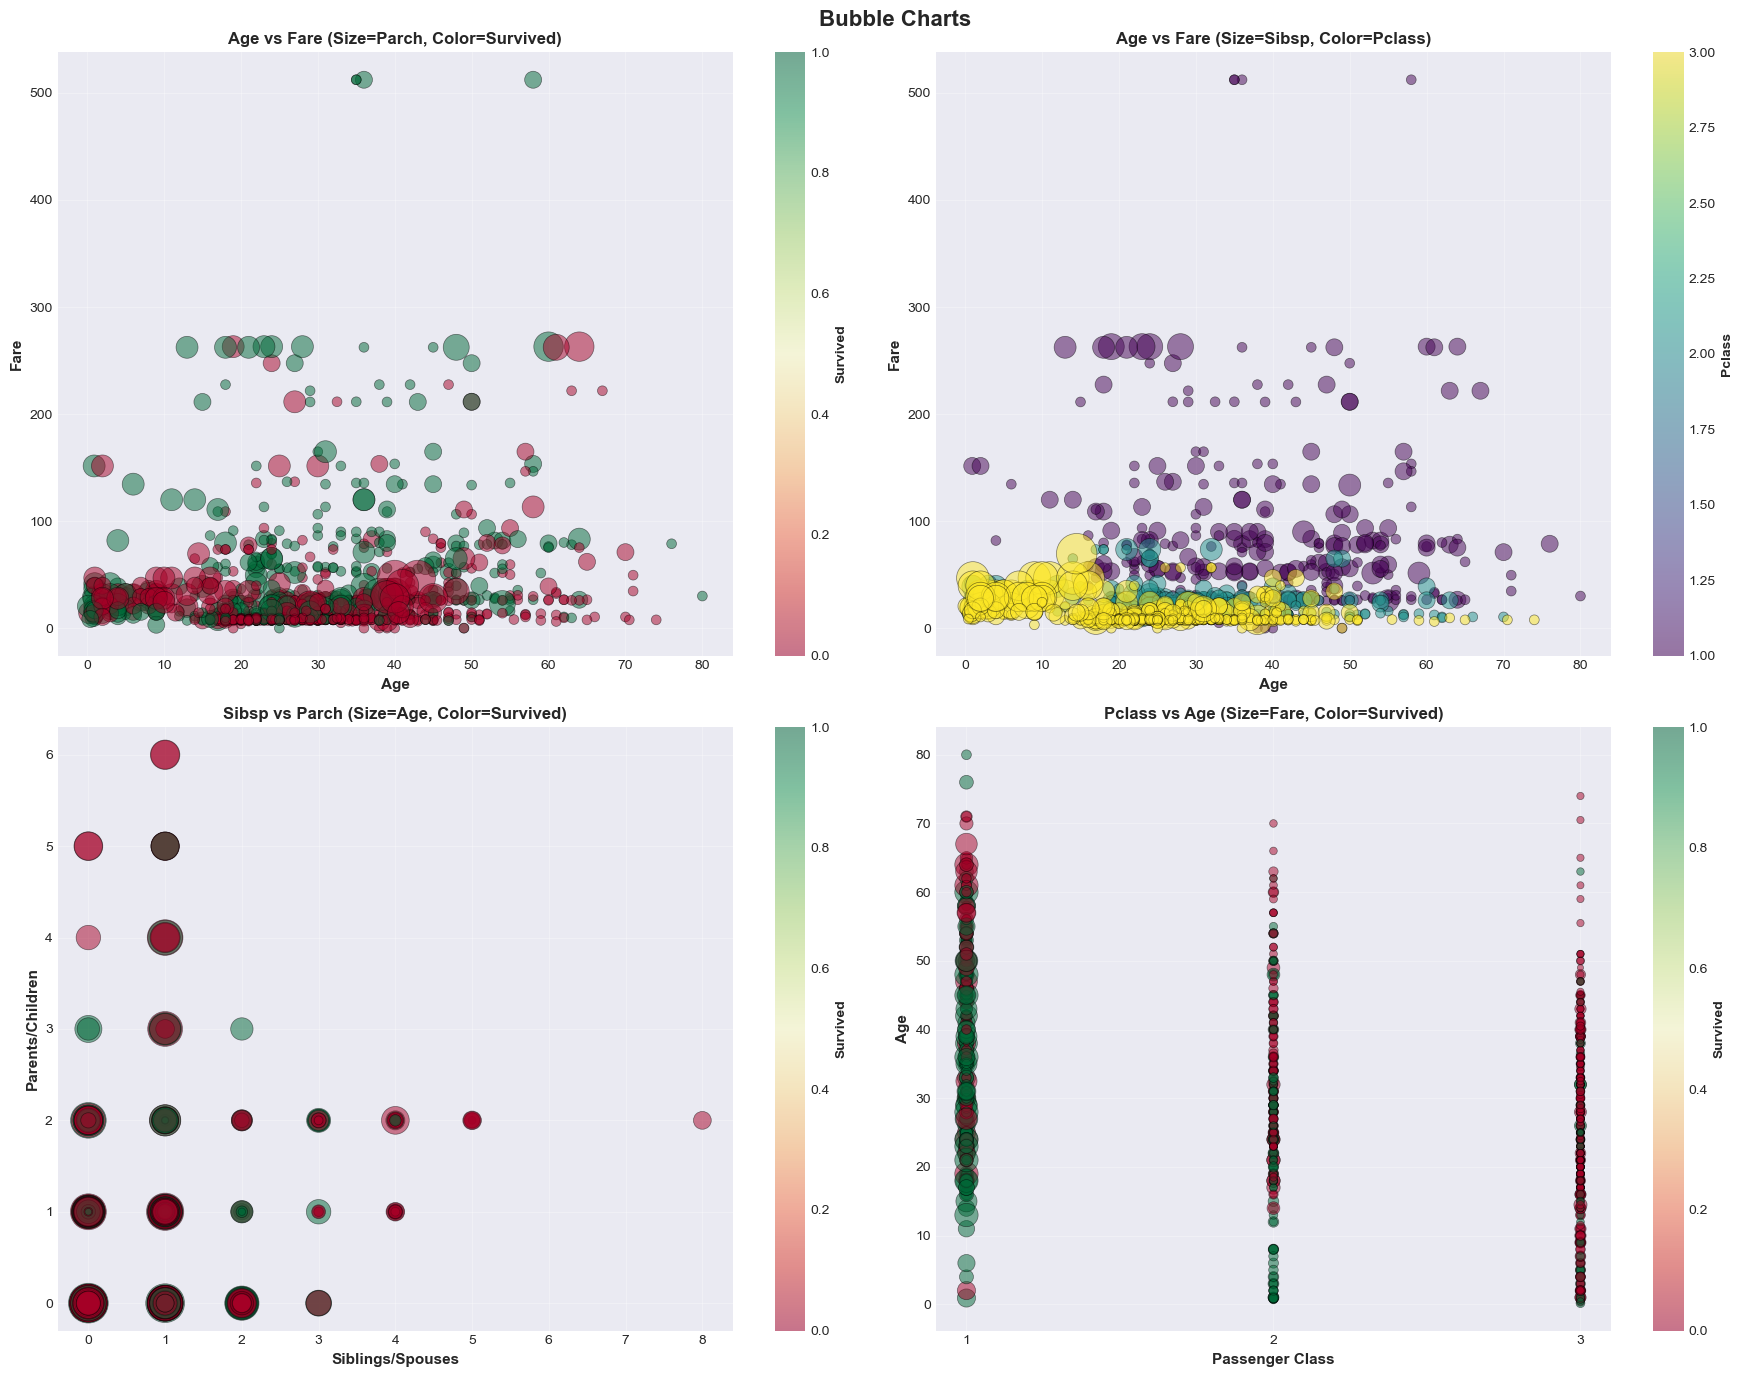

In [26]:
# Multivariate Graphical: Bubble Chart

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Bubble Charts', fontsize=16, fontweight='bold')

# Bubble Chart 1: Age vs Fare, size=Parch, color=Survived
ax1 = axes[0, 0]
bubble_data = df[['age', 'fare', 'parch', 'survived']].dropna()
scatter1 = ax1.scatter(bubble_data['age'], bubble_data['fare'], 
                       s=bubble_data['parch']*100 + 50, 
                       c=bubble_data['survived'], 
                       alpha=0.5, cmap='RdYlGn', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Age', fontsize=11, fontweight='bold')
ax1.set_ylabel('Fare', fontsize=11, fontweight='bold')
ax1.set_title('Age vs Fare (Size=Parch, Color=Survived)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Survived', fontsize=10, fontweight='bold')

# Bubble Chart 2: Age vs Fare, size=Sibsp, color=Pclass
ax2 = axes[0, 1]
bubble_data = df[['age', 'fare', 'sibsp', 'pclass']].dropna()
scatter2 = ax2.scatter(bubble_data['age'], bubble_data['fare'], 
                       s=bubble_data['sibsp']*100 + 50, 
                       c=bubble_data['pclass'], 
                       alpha=0.5, cmap='viridis', edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Age', fontsize=11, fontweight='bold')
ax2.set_ylabel('Fare', fontsize=11, fontweight='bold')
ax2.set_title('Age vs Fare (Size=Sibsp, Color=Pclass)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Pclass', fontsize=10, fontweight='bold')

# Bubble Chart 3: Sibsp vs Parch, size=Age, color=Survived
ax3 = axes[1, 0]
bubble_data = df[['sibsp', 'parch', 'age', 'survived']].dropna()
# Limit age to reasonable range for bubble size
bubble_data_limited = bubble_data[bubble_data['age'] <= 80]
scatter3 = ax3.scatter(bubble_data_limited['sibsp'], bubble_data_limited['parch'], 
                       s=bubble_data_limited['age']*10 + 20, 
                       c=bubble_data_limited['survived'], 
                       alpha=0.5, cmap='RdYlGn', edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Siblings/Spouses', fontsize=11, fontweight='bold')
ax3.set_ylabel('Parents/Children', fontsize=11, fontweight='bold')
ax3.set_title('Sibsp vs Parch (Size=Age, Color=Survived)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=ax3)
cbar3.set_label('Survived', fontsize=10, fontweight='bold')

# Bubble Chart 4: Pclass vs Age, size=Fare, color=Survived
ax4 = axes[1, 1]
bubble_data = df[['pclass', 'age', 'fare', 'survived']].dropna()
# Limit fare for better visualization
bubble_data_limited = bubble_data[bubble_data['fare'] <= 300]
scatter4 = ax4.scatter(bubble_data_limited['pclass'], bubble_data_limited['age'], 
                       s=bubble_data_limited['fare'] + 20, 
                       c=bubble_data_limited['survived'], 
                       alpha=0.5, cmap='RdYlGn', edgecolors='black', linewidth=0.5)
ax4.set_xlabel('Passenger Class', fontsize=11, fontweight='bold')
ax4.set_ylabel('Age', fontsize=11, fontweight='bold')
ax4.set_title('Pclass vs Age (Size=Fare, Color=Survived)', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_xticks([1, 2, 3])
cbar4 = plt.colorbar(scatter4, ax=ax4)
cbar4.set_label('Survived', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## Summary

This comprehensive analysis covers:

### **Univariate Analysis**
- **Non-Graphical**: Mean, Median, Mode, Variance, Std Dev, Range, IQR, Frequency Tables
- **Graphical**: Histograms, Boxplots, Stem-and-Leaf Plots, Dot Plots, Bar Charts

### **Bivariate Analysis**
- **Non-Graphical**: Correlation Coefficients, Covariances, Contingency Tables, Two-sample t-tests
- **Graphical**: Scatter Plots, Side-by-Side Boxplots, Line Graphs, Grouped Bar Charts

### **Multivariate Analysis**
- **Non-Graphical**: Correlation Matrix, Descriptive Stats Tables, MANOVA, Multiple Regression
- **Graphical**: Scatterplot Matrix, 3D Scatter Plots, Heatmaps, Parallel Coordinates Plots, Bubble Charts

All analyses have been performed on the Titanic dataset to provide comprehensive statistical insights!